<a href="https://colab.research.google.com/github/Eshwar1435/SML_2072/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reading data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data=pd.read_csv('/content/drive/MyDrive/stml-project/block_1.csv')
data.head()

,id_1,id_2,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz,is_match
0,37291,53113,0.833333333333333,?,1.0,?,1,1,1,1,0,True
1,39086,47614,1,?,1.0,?,1,1,1,1,1,True
2,70031,70237,1,?,1.0,?,1,1,1,1,1,True
3,84795,97439,1,?,1.0,?,1,1,1,1,1,True
4,36950,42116,1,?,1.0,1,1,1,1,1,1,True


In [ ]:
target=data['is_match']
target.head()

,is_match
0,True
1,True
2,True
3,True
4,True


In [ ]:
x=data.drop(['is_match','id_1','id_2'],axis=1)
x.head()

,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz
0,0.833333333333333,?,1.0,?,1,1,1,1,0
1,1,?,1.0,?,1,1,1,1,1
2,1,?,1.0,?,1,1,1,1,1
3,1,?,1.0,?,1,1,1,1,1
4,1,?,1.0,1,1,1,1,1,1


In [ ]:
x.isnull().sum()

,0
cmp_fname_c1,0
cmp_fname_c2,0
cmp_lname_c1,0
cmp_lname_c2,0
cmp_sex,0
cmp_bd,0
cmp_bm,0
cmp_by,0
cmp_plz,0


In [ ]:
x.replace('?',0, inplace=True)
x.isnull().sum()

,0
cmp_fname_c1,0
cmp_fname_c2,0
cmp_lname_c1,0
cmp_lname_c2,0
cmp_sex,0
cmp_bd,0
cmp_bm,0
cmp_by,0
cmp_plz,0


In [ ]:
feature_names=x.columns
feature_names

Index(['cmp_fname_c1', 'cmp_fname_c2', 'cmp_lname_c1', 'cmp_lname_c2',
       'cmp_sex', 'cmp_bd', 'cmp_bm', 'cmp_by', 'cmp_plz'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

In [ ]:
x=pd.DataFrame(x_std,columns=feature_names)
x.head()

,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz
0,0.310276,-0.129231,2.047657,-0.013348,0.216839,1.857352,1.0231,1.868558,-0.074248
1,0.738715,-0.129231,2.047657,-0.013348,0.216839,1.857352,1.0231,1.868558,13.468343
2,0.738715,-0.129231,2.047657,-0.013348,0.216839,1.857352,1.0231,1.868558,13.468343
3,0.738715,-0.129231,2.047657,-0.013348,0.216839,1.857352,1.0231,1.868558,13.468343
4,0.738715,-0.129231,2.047657,98.206406,0.216839,1.857352,1.0231,1.868558,13.468343


In [ ]:
target.replace('True',1, inplace=True)
target.replace('False',0, inplace=True)

In [ ]:
x.shape

(574913, 9)

#Before resampling data

In [ ]:
x.dtypes

,0
cmp_fname_c1,float64
cmp_fname_c2,float64
cmp_lname_c1,float64
cmp_lname_c2,float64
cmp_sex,float64
cmp_bd,float64
cmp_bm,float64
cmp_by,float64
cmp_plz,float64


In [ ]:
print(x)

        cmp_fname_c1  cmp_fname_c2  cmp_lname_c1  cmp_lname_c2   cmp_sex  \
0           0.310276     -0.129231      2.047657     -0.013348  0.216839   
1           0.738715     -0.129231      2.047657     -0.013348  0.216839   
2           0.738715     -0.129231      2.047657     -0.013348  0.216839   
3           0.738715     -0.129231      2.047657     -0.013348  0.216839   
4           0.738715     -0.129231      2.047657     98.206406  0.216839   
...              ...           ...           ...           ...       ...   
574908      0.738715     -0.129231     -0.089329     -0.013348  0.216839   
574909      0.738715     -0.129231     -0.570151     -0.013348  0.216839   
574910      0.738715     -0.129231     -0.672143     -0.013348  0.216839   
574911      0.738715     -0.129231     -0.611703     -0.013348  0.216839   
574912      0.738715     -0.129231     -0.944123     -0.013348  0.216839   

          cmp_bd    cmp_bm    cmp_by    cmp_plz  
0       1.857352  1.023100  1.868558 

In [ ]:
for col in x.columns:
  if x[col].dtype == 'object':
    try:
      x[col] = x[col].astype('int64')
    except ValueError:
      x[col] = x[col].astype('float64').astype('int64')

In [ ]:
print(x)

        cmp_fname_c1  cmp_fname_c2  cmp_lname_c1  cmp_lname_c2   cmp_sex  \
0           0.310276     -0.129231      2.047657     -0.013348  0.216839   
1           0.738715     -0.129231      2.047657     -0.013348  0.216839   
2           0.738715     -0.129231      2.047657     -0.013348  0.216839   
3           0.738715     -0.129231      2.047657     -0.013348  0.216839   
4           0.738715     -0.129231      2.047657     98.206406  0.216839   
...              ...           ...           ...           ...       ...   
574908      0.738715     -0.129231     -0.089329     -0.013348  0.216839   
574909      0.738715     -0.129231     -0.570151     -0.013348  0.216839   
574910      0.738715     -0.129231     -0.672143     -0.013348  0.216839   
574911      0.738715     -0.129231     -0.611703     -0.013348  0.216839   
574912      0.738715     -0.129231     -0.944123     -0.013348  0.216839   

          cmp_bd    cmp_bm    cmp_by    cmp_plz  
0       1.857352  1.023100  1.868558 

In [ ]:
x.dtypes

,0
cmp_fname_c1,float64
cmp_fname_c2,float64
cmp_lname_c1,float64
cmp_lname_c2,float64
cmp_sex,float64
cmp_bd,float64
cmp_bm,float64
cmp_by,float64
cmp_plz,float64


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574913 entries, 0 to 574912
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   cmp_fname_c1  574913 non-null  float64
 1   cmp_fname_c2  574913 non-null  float64
 2   cmp_lname_c1  574913 non-null  float64
 3   cmp_lname_c2  574913 non-null  float64
 4   cmp_sex       574913 non-null  float64
 5   cmp_bd        574913 non-null  float64
 6   cmp_bm        574913 non-null  float64
 7   cmp_by        574913 non-null  float64
 8   cmp_plz       574913 non-null  float64
dtypes: float64(9)
memory usage: 39.5 MB


In [ ]:
x.describe()

,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz
count,5.749130e+05,5.749130e+05,5.749130e+05,5.749130e+05,5.749130e+05,5.749130e+05,5.749130e+05,5.749130e+05,5.749130e+05
mean,-1.028804e-15,3.707740e-18,2.113165e-16,2.990911e-18,-5.091964e-18,1.443547e-17,-3.453142e-17,-1.085626e-16,1.406470e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.831916e+00,-1.292313e-01,-9.441234e-01,-1.334843e-02,-4.611715e+00,-5.384009e-01,-9.774218e-01,-5.351721e-01,-7.424818e-02
25%,-1.097450e+00,-1.292313e-01,-6.449454e-01,-1.334843e-02,2.168391e-01,-5.384009e-01,-9.774218e-01,-5.351721e-01,-7.424818e-02
50%,7.387147e-01,-1.292313e-01,-4.001634e-01,-1.334843e-02,2.168391e-01,-5.384009e-01,-9.774218e-01,-5.351721e-01,-7.424818e-02
75%,7.387147e-01,-1.292313e-01,3.380681e-01,-1.334843e-02,2.168391e-01,-5.384009e-01,1.023100e+00,-5.351721e-01,-7.424818e-02
max,7.387147e-01,7.886075e+00,2.047657e+00,9.820641e+01,2.168391e-01,1.857352e+00,1.023100e+00,1.868558e+00,1.346834e+01


In [ ]:
for clo in x.columns:
  print(x[clo].describe())
  print()
  print()
  print()

count    5.749130e+05
mean    -1.028804e-15
std      1.000001e+00
min     -1.831916e+00
25%     -1.097450e+00
50%      7.387147e-01
75%      7.387147e-01
max      7.387147e-01
Name: cmp_fname_c1, dtype: float64



count    5.749130e+05
mean     3.707740e-18
std      1.000001e+00
min     -1.292313e-01
25%     -1.292313e-01
50%     -1.292313e-01
75%     -1.292313e-01
max      7.886075e+00
Name: cmp_fname_c2, dtype: float64



count    5.749130e+05
mean     2.113165e-16
std      1.000001e+00
min     -9.441234e-01
25%     -6.449454e-01
50%     -4.001634e-01
75%      3.380681e-01
max      2.047657e+00
Name: cmp_lname_c1, dtype: float64



count    5.749130e+05
mean     2.990911e-18
std      1.000001e+00
min     -1.334843e-02
25%     -1.334843e-02
50%     -1.334843e-02
75%     -1.334843e-02
max      9.820641e+01
Name: cmp_lname_c2, dtype: float64



count    5.749130e+05
mean    -5.091964e-18
std      1.000001e+00
min     -4.611715e+00
25%      2.168391e-01
50%      2.168391e-01
75%      2.1

In [ ]:
for clo in x.columns:
  print(x[clo].info())
  print()
  print()
  print()

<class 'pandas.core.series.Series'>
RangeIndex: 574913 entries, 0 to 574912
Series name: cmp_fname_c1
Non-Null Count   Dtype  
--------------   -----  
574913 non-null  float64
dtypes: float64(1)
memory usage: 4.4 MB
None



<class 'pandas.core.series.Series'>
RangeIndex: 574913 entries, 0 to 574912
Series name: cmp_fname_c2
Non-Null Count   Dtype  
--------------   -----  
574913 non-null  float64
dtypes: float64(1)
memory usage: 4.4 MB
None



<class 'pandas.core.series.Series'>
RangeIndex: 574913 entries, 0 to 574912
Series name: cmp_lname_c1
Non-Null Count   Dtype  
--------------   -----  
574913 non-null  float64
dtypes: float64(1)
memory usage: 4.4 MB
None



<class 'pandas.core.series.Series'>
RangeIndex: 574913 entries, 0 to 574912
Series name: cmp_lname_c2
Non-Null Count   Dtype  
--------------   -----  
574913 non-null  float64
dtypes: float64(1)
memory usage: 4.4 MB
None



<class 'pandas.core.series.Series'>
RangeIndex: 574913 entries, 0 to 574912
Series name: cmp_sex
Non

In [ ]:
for clo in x.columns:
  print(x[clo].value_counts())
  print()
  print()
  print()

cmp_fname_c1
 0.738715    350899
-1.831916     45930
-0.803663     28162
-1.464683     16041
-1.403477     15501
-1.510587     15492
-1.189258     13721
-1.546290     12345
-1.260664      9654
-0.975039      9563
-1.317790      8746
-1.097450      7941
 0.417386      7095
-0.546600      4566
 0.096057      4556
-0.730217      3438
-0.867929      3206
 0.224589      3199
-0.289537      1994
-0.689413      1648
 0.371482      1630
-0.118162      1462
 0.453089      1446
 0.310276      1354
-1.574853      1019
 0.481652       753
-0.362984       716
-0.225272       679
-1.060726       642
-0.403788       511
 0.004249       462
 0.167464       291
-1.364528        99
-1.598222        40
-0.032474        34
-1.130835        31
-0.897141        29
-1.617696         8
-0.663447         5
 0.271327         1
-0.622207         1
-1.436434         1
-0.429754         1
 0.505021         1
Name: count, dtype: int64



cmp_fname_c2
-0.129231    564967
 7.886075      8982
 3.076891       189
 1.01

In [ ]:
for clo in x.columns:
  print(x[clo].unique())
  print()
  print()
  print()

[ 0.31027635  0.73871474  0.45308915 -1.189258    0.41738595  0.22458868
 -1.83191558  0.27132741 -0.54660042 -0.11816203 -1.40347719 -1.2606644
 -0.80366345 -1.31778951 -1.51058679 -1.09744977 -0.73021687 -1.46468267
  0.09605716 -0.9750388  -1.54628999 -0.68941321 -0.86792921 -0.22527163
 -0.28953739  0.37148184 -1.36452825  0.00424894  0.48165171 -1.57485255
 -1.06072648 -0.40378762  0.16746356 -0.36298397 -0.03247435 -1.59822191
 -1.13083458 -0.89714092 -0.66344725 -0.62220719 -1.61769638 -1.43643399
 -0.42975359  0.50502108]



[-0.12923128  7.88607495  3.30589996  1.65194788  1.20665309  3.07689121
  2.16085621  1.47382996  2.54253746  4.45094371  0.7613583   1.01581246
  6.88416167  5.21430621  0.67229934  4.67995246  6.55019058  0.872682
  1.87459527  2.87650855  6.28301371  3.87842183  5.88224839  4.32371663
  2.27536059]



[ 2.04765662e+00 -1.96178367e-01  1.74847862e+00  1.81751970e+00
  1.67368412e+00  1.71523662e+00  1.29971162e+00  1.54902662e+00
  1.62025948e+00  1.7756

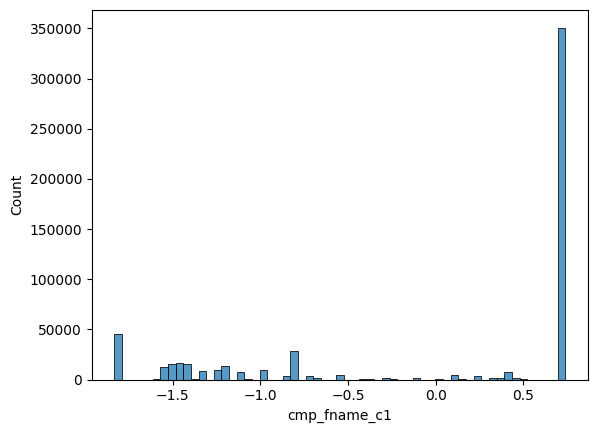

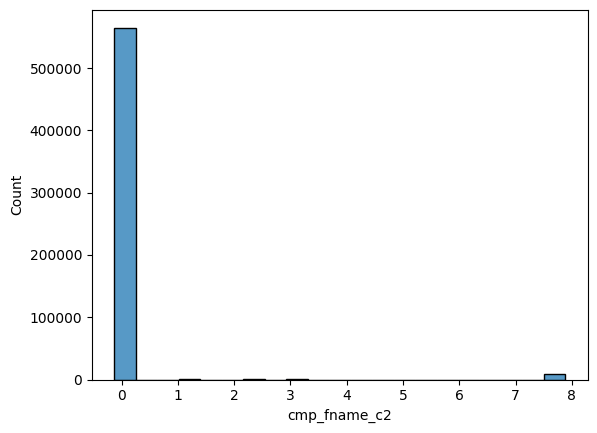

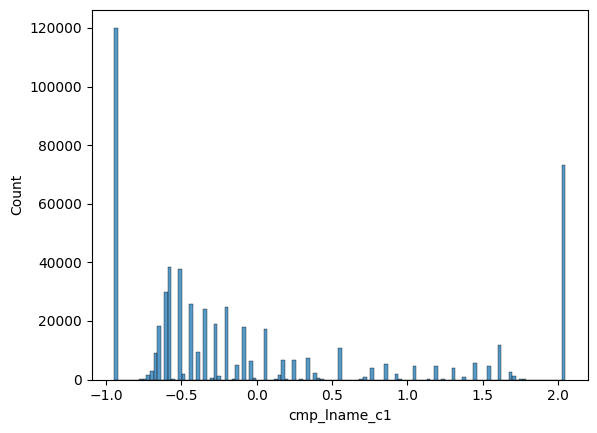

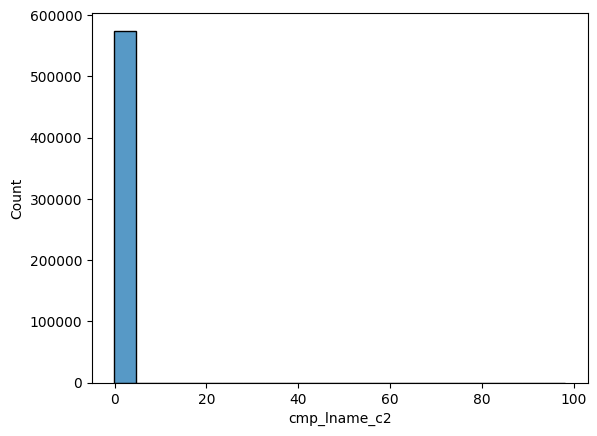

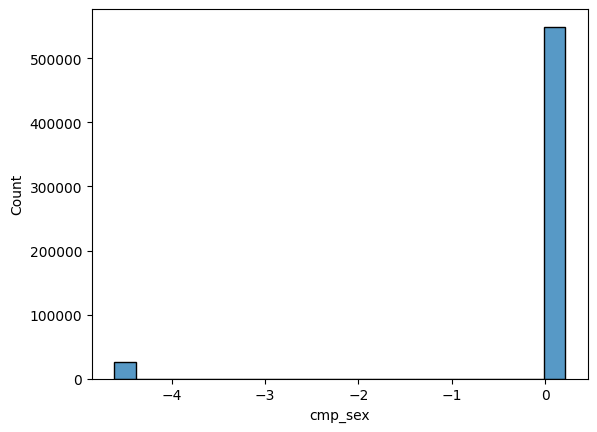

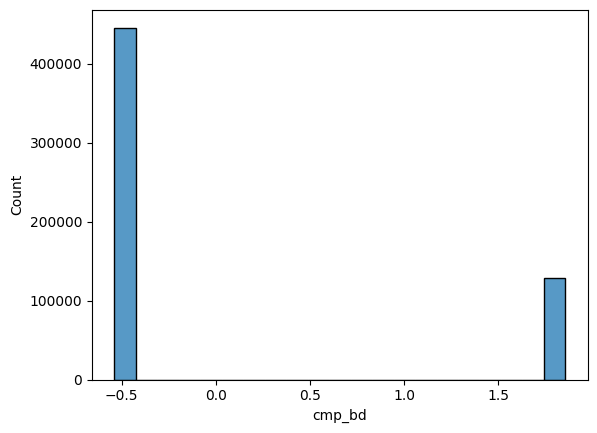

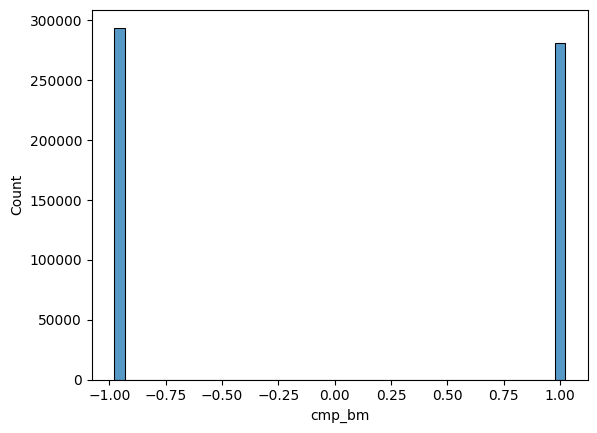

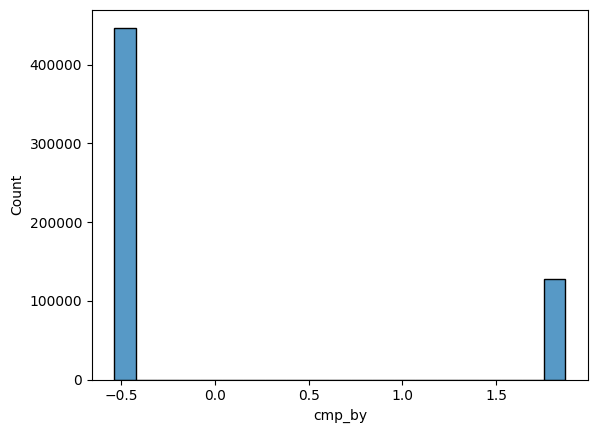

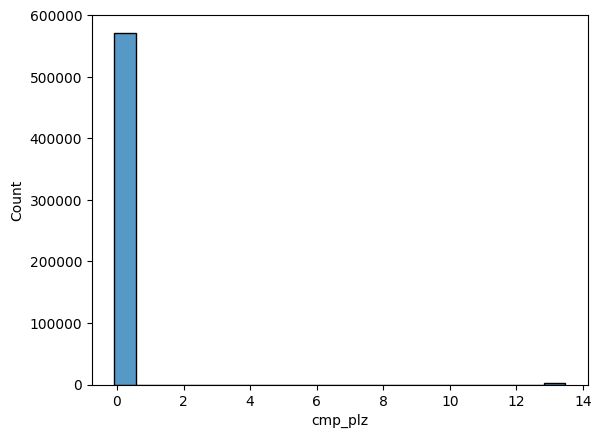

In [ ]:
for clo in x.columns:
  if x[clo].dtype == 'int64':
    sns.histplot(x[clo], discrete=True)
  elif x[clo].dtype == 'float64':
    sns.histplot(x[clo])

  plt.show()

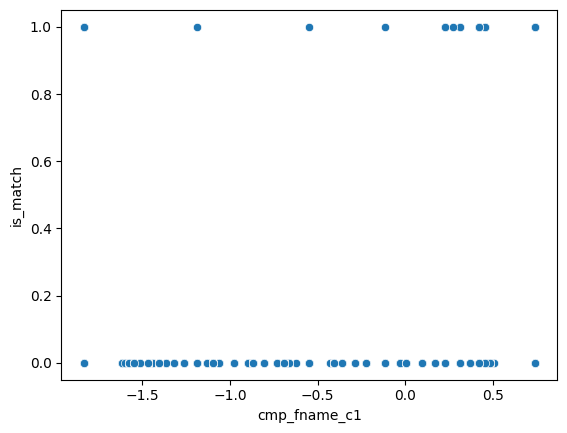

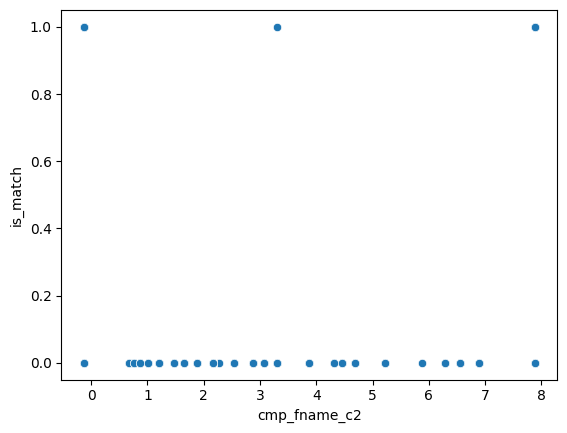

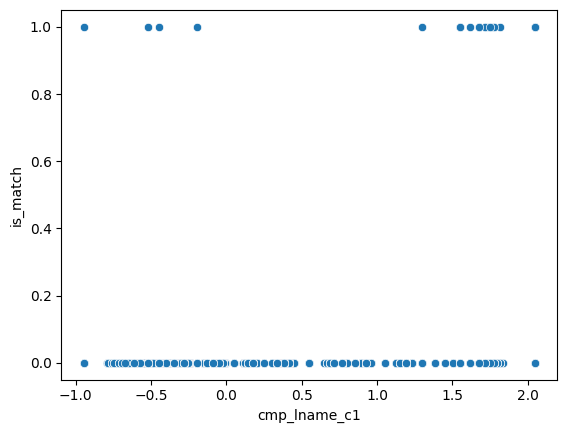

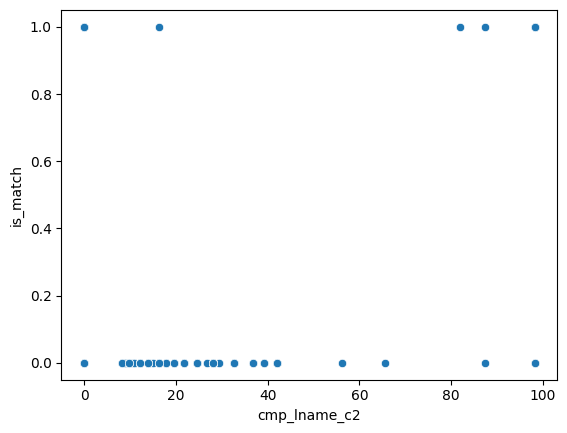

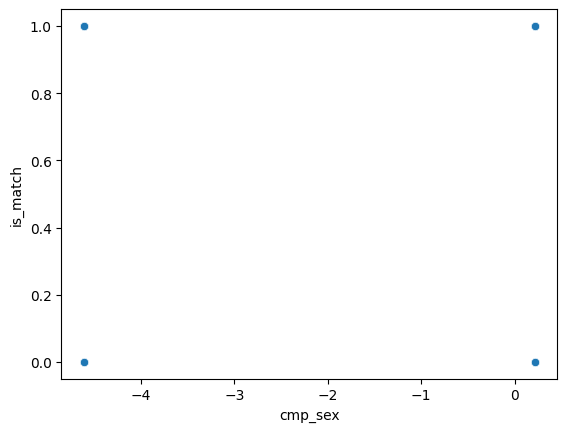

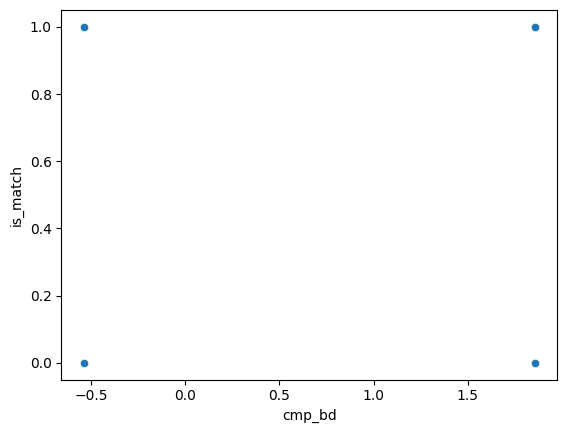

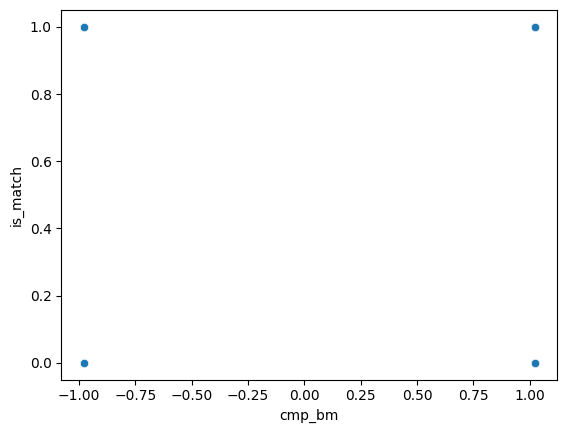

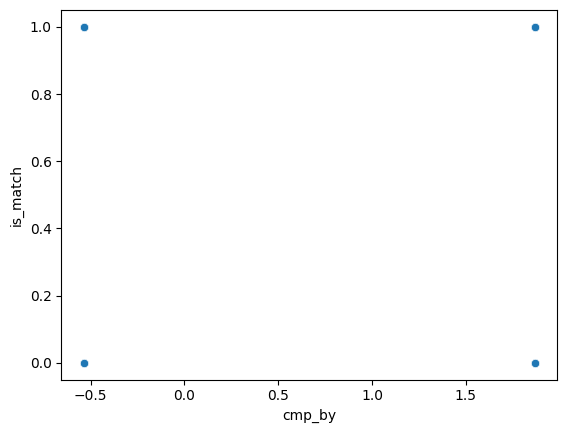

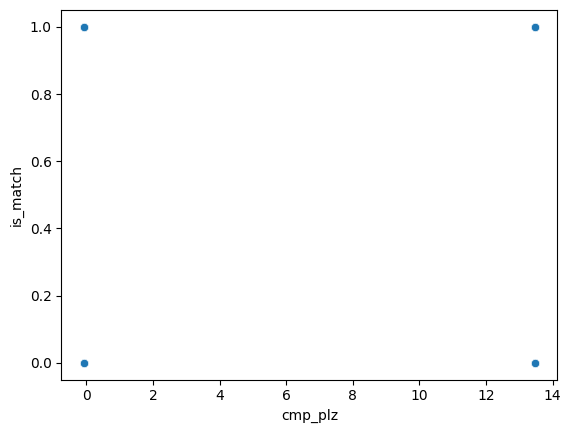

In [ ]:
for col in x.columns:
    sns.scatterplot(x=x[col],y=target)
    plt.show()

In [ ]:
x.corr()

,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz
cmp_fname_c1,1.000000,0.078627,-0.668199,0.007165,0.152826,0.018125,0.273400,0.034014,0.032495
cmp_fname_c2,0.078627,1.000000,-0.053750,0.001014,0.019014,0.002879,0.024142,0.006929,0.016487
cmp_lname_c1,-0.668199,-0.053750,1.000000,0.016716,0.109717,-0.211217,-0.391373,-0.219276,0.100472
cmp_lname_c2,0.007165,0.001014,0.016716,1.000000,0.000100,0.017115,0.009380,0.016804,0.117648
cmp_sex,0.152826,0.019014,0.109717,0.000100,1.000000,-0.243647,-0.151330,-0.240803,0.009389
cmp_bd,0.018125,0.002879,-0.211217,0.017115,-0.243647,1.000000,-0.182806,0.071814,0.084236
cmp_bm,0.273400,0.024142,-0.391373,0.009380,-0.151330,-0.182806,1.000000,-0.181351,0.046228
cmp_by,0.034014,0.006929,-0.219276,0.016804,-0.240803,0.071814,-0.181351,1.000000,0.086588
cmp_plz,0.032495,0.016487,0.100472,0.117648,0.009389,0.084236,0.046228,0.086588,1.000000


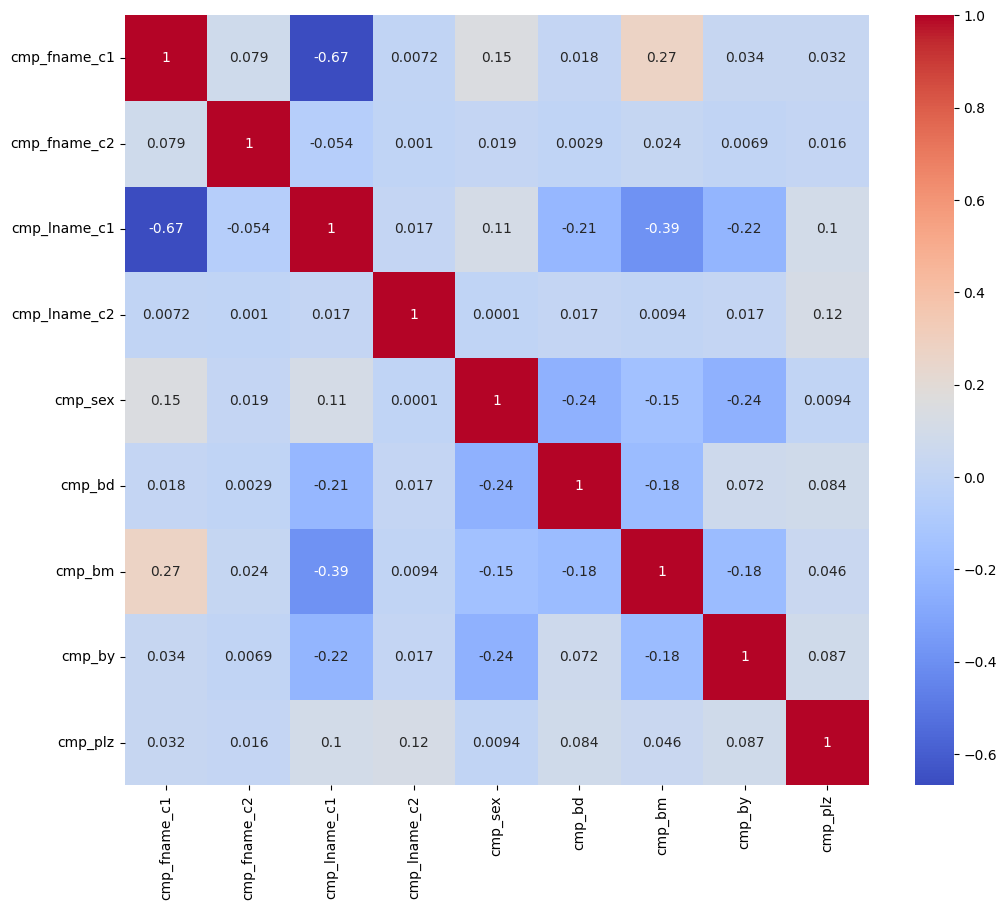

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
target.value_counts()

,count
is_match,
False,572820
True,2093


In [ ]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 574913 entries, 0 to 574912
Series name: is_match
Non-Null Count   Dtype
--------------   -----
574913 non-null  bool 
dtypes: bool(1)
memory usage: 561.6 KB


In [ ]:
target.describe()

,is_match
count,574913
unique,2
top,False
freq,572820


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,target,test_size=0.2,random_state=42)

In [ ]:
x_train

,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz
376146,-0.803663,-0.129231,0.551767,-0.013348,0.216839,-0.538401,-0.977422,-0.535172,-0.074248
97523,-0.975039,-0.129231,2.047657,-0.013348,0.216839,-0.538401,-0.977422,-0.535172,-0.074248
475218,0.738715,-0.129231,-0.944123,-0.013348,0.216839,-0.538401,-0.977422,1.868558,-0.074248
336184,0.738715,-0.129231,-0.196178,-0.013348,0.216839,-0.538401,1.023100,-0.535172,-0.074248
338599,0.738715,-0.129231,-0.944123,-0.013348,0.216839,-0.538401,1.023100,-0.535172,-0.074248
...,...,...,...,...,...,...,...,...,...
110268,0.738715,-0.129231,-0.516726,-0.013348,0.216839,1.857352,-0.977422,-0.535172,-0.074248
259178,0.738715,-0.129231,-0.345767,-0.013348,0.216839,-0.538401,-0.977422,1.868558,-0.074248
365838,0.738715,-0.129231,-0.944123,-0.013348,0.216839,1.857352,-0.977422,-0.535172,-0.074248
131932,-1.464683,-0.129231,0.717977,-0.013348,0.216839,-0.538401,1.023100,-0.535172,-0.074248


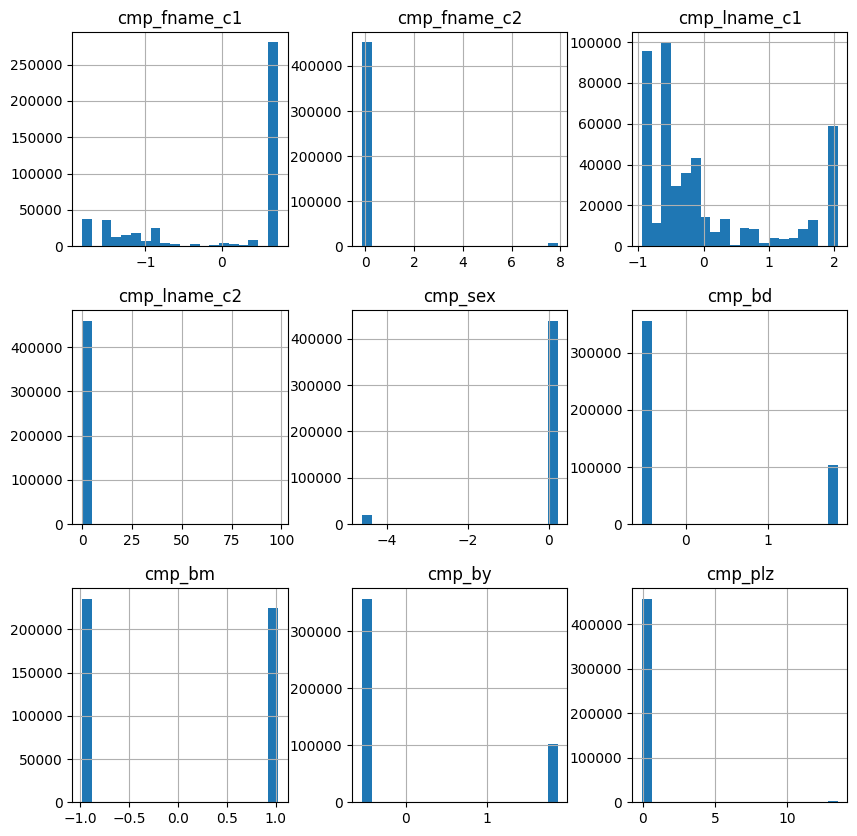

In [ ]:
x_train.hist(bins=20, figsize=(10,10))
plt.show()

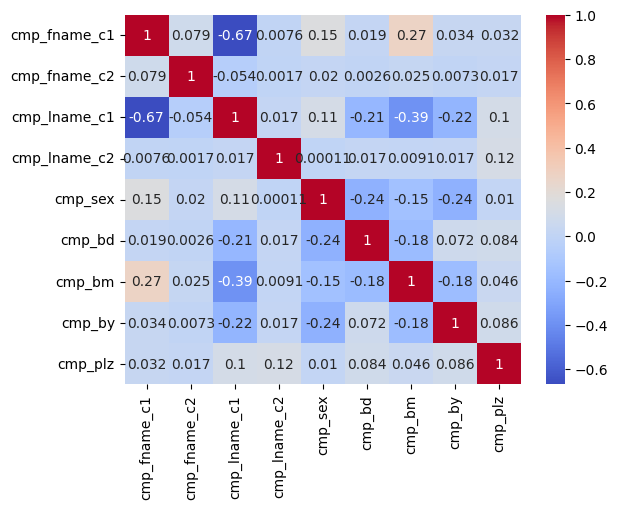

In [ ]:
sns.heatmap(x_train.corr(), annot=True, cmap='coolwarm')
plt.show()


##Perceptron

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay,roc_curve,auc,precision_recall_curve

In [ ]:
from sklearn.linear_model import Perceptron
pm=Perceptron()
pm.fit(x_train,y_train)

Perceptron()

In [ ]:
yp=pm.predict(x_test)

In [ ]:

cm = confusion_matrix(y_test,yp)
print(cm)

[[114547     10]
 [     4    422]]


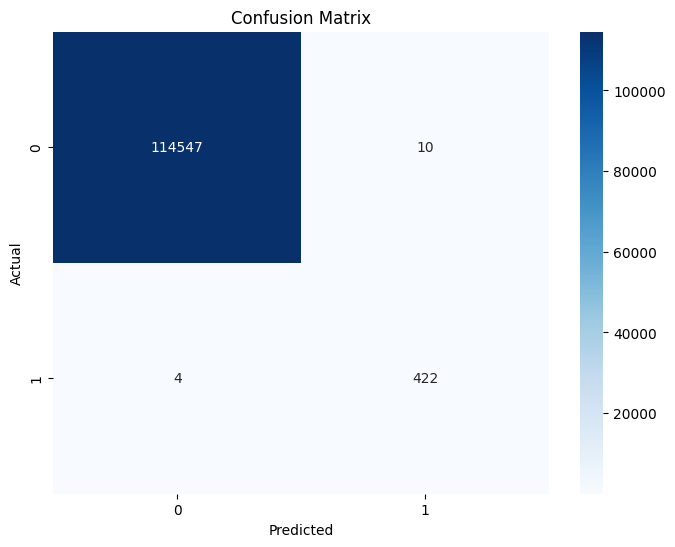

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


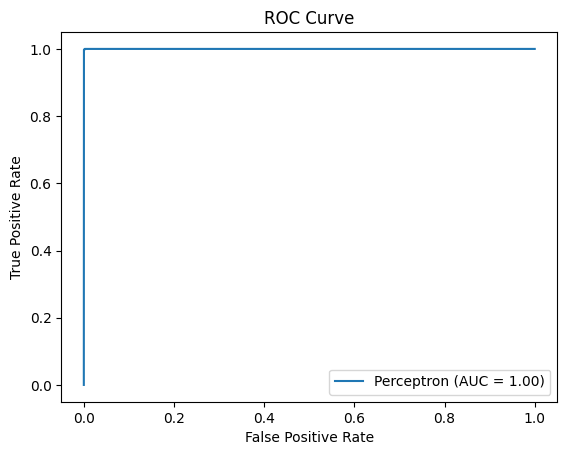

In [ ]:
y_pred_proba = pm.decision_function(x_test)
y_pred_proba=(1/(1+np.exp(-y_pred_proba)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Perceptron (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

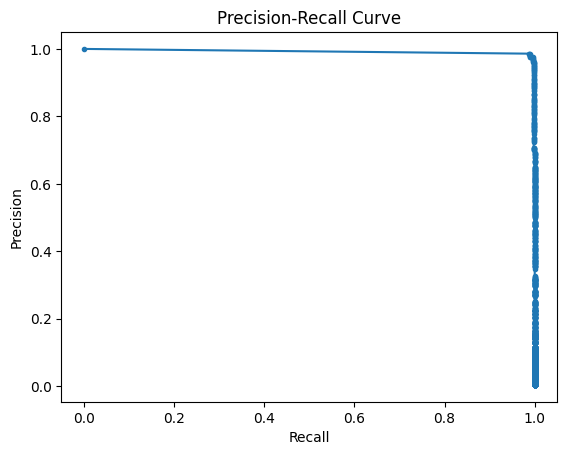

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    114557
        True       0.98      0.99      0.98       426

    accuracy                           1.00    114983
   macro avg       0.99      1.00      0.99    114983
weighted avg       1.00      1.00      1.00    114983



In [ ]:
accuracy_perceptron = accuracy_score(y_test,yp)
print(accuracy_perceptron)

0.9998782428706853


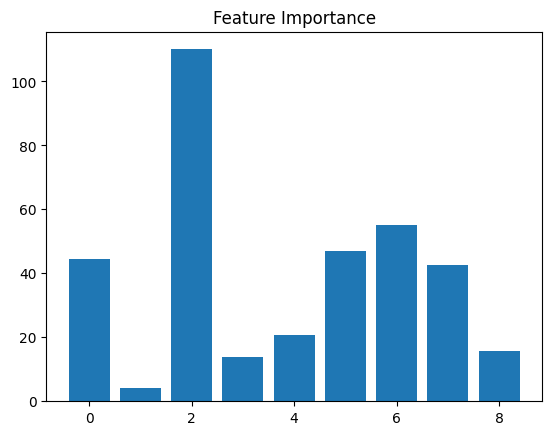

In [ ]:
importance = pm.coef_[0]
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance")
plt.show()



##LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
yp = lr.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, yp)
print(cm)

[[114557      0]
 [     3    423]]


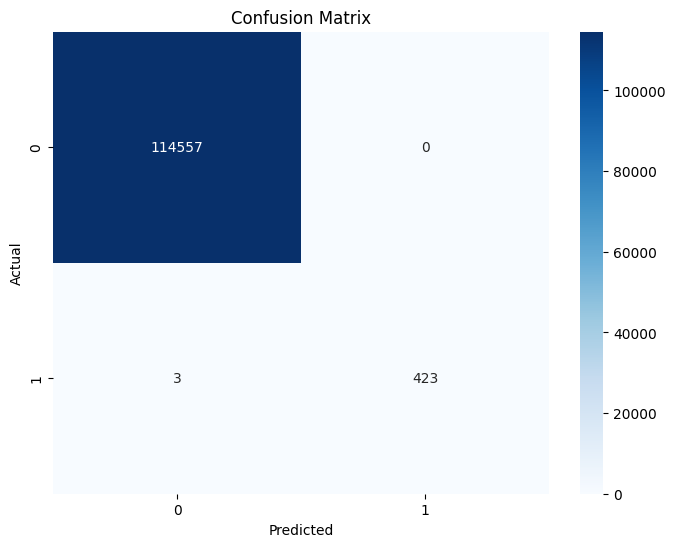

In [ ]:


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


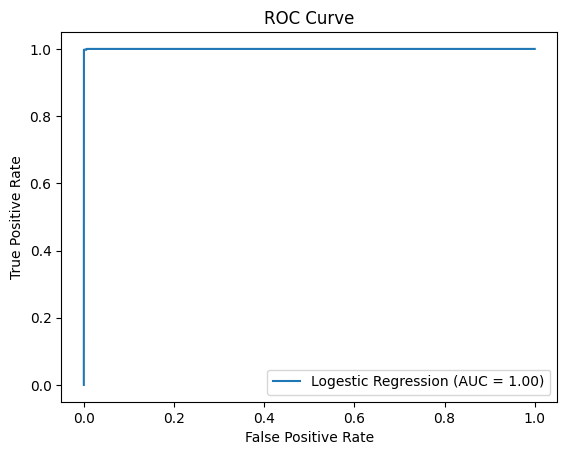

In [ ]:
y_pred_proba = lr.decision_function(x_test)
y_pred_proba=(1/(1+np.exp(-y_pred_proba)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Logestic Regression (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

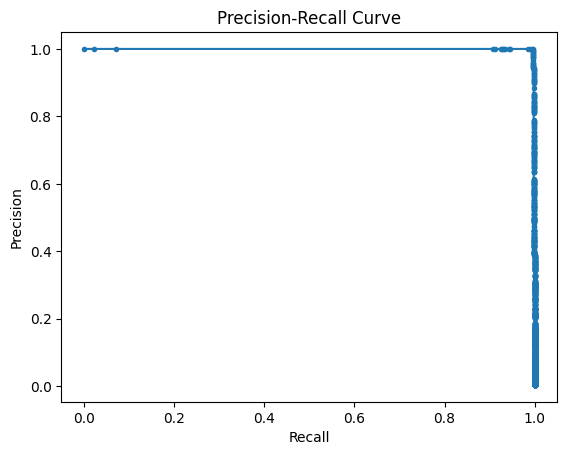

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

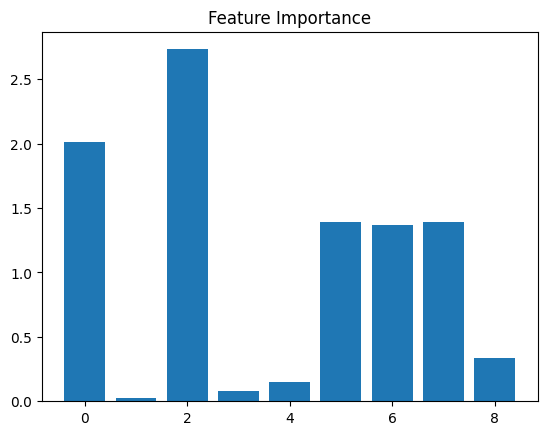

In [ ]:
importance = lr.coef_[0]
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance")
plt.show()


In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    114557
        True       1.00      0.99      1.00       426

    accuracy                           1.00    114983
   macro avg       1.00      1.00      1.00    114983
weighted avg       1.00      1.00      1.00    114983



In [ ]:
accuracy_logistic=accuracy_score(y_test,yp)
print(accuracy_logistic)

0.9999739091865754


##Support Vector Mechine

In [ ]:
from cuml.svm import SVC as cumlSVC
import cupy as cp

In [ ]:
# from sklearn.svm import SVC
sv=cumlSVC()
sv.fit(x_train,y_train)

SVC()

In [ ]:
yp=sv.predict(x_test)

In [ ]:

cm = confusion_matrix(y_test, yp)
print(cm)

[[114557      0]
 [     5    421]]


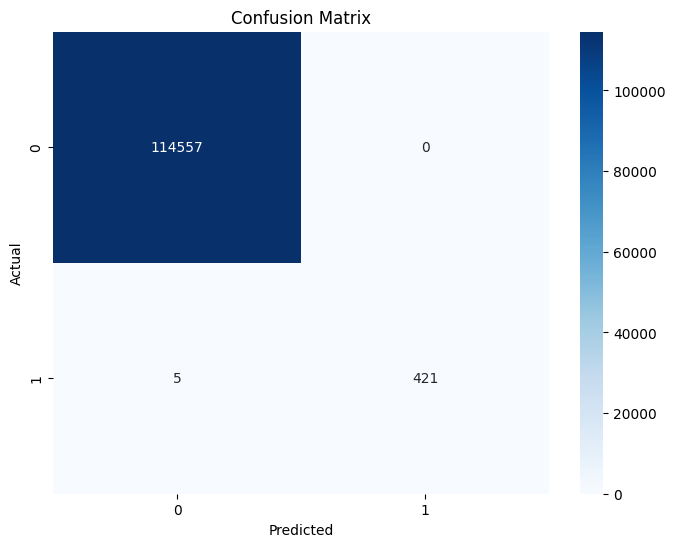

In [ ]:


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


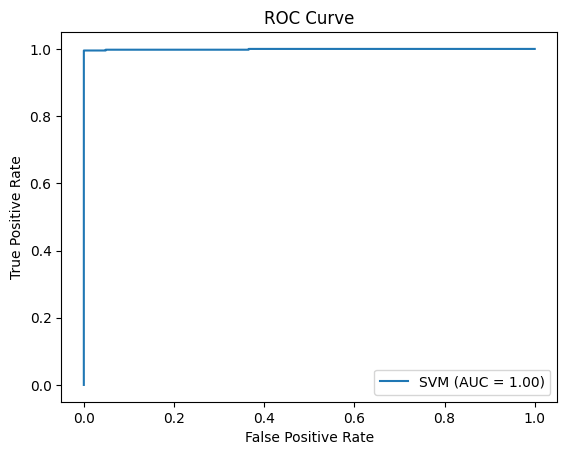

In [ ]:
y_pred_proba = sv.decision_function(x_test)
y_pred_proba=(1/(1+np.exp(-y_pred_proba)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

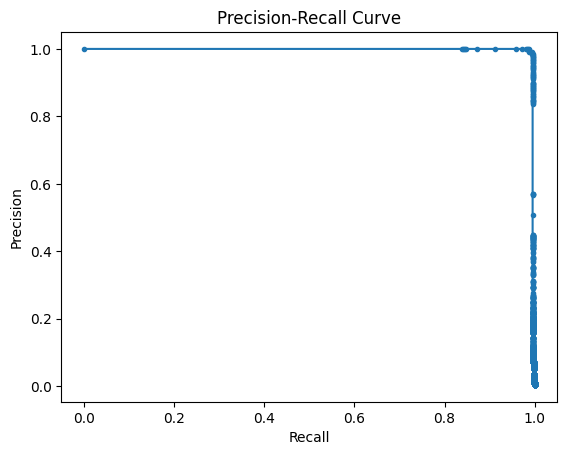

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    114557
        True       1.00      0.99      0.99       426

    accuracy                           1.00    114983
   macro avg       1.00      0.99      1.00    114983
weighted avg       1.00      1.00      1.00    114983



In [ ]:
accuracy_svc = accuracy_score(y_test,yp)
print(accuracy_svc)

0.999956515310959


##ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
14373/14373 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9992 - loss: 0.0070
Epoch 2/5
14373/14373 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 1.0000 - loss: 1.9642e-04
Epoch 3/5
14373/14373 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 1.0000 - loss: 2.2455e-04
Epoch 4/5
14373/14373 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 1.0000 - loss: 1.8581e-04
Epoch 5/5
14373/14373 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 1.0000 - loss: 2.1907e-04


In [ ]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

3594/3594 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9999 - loss: 3.5262e-04
Accuracy: 99.99


In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

3594/3594 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [ ]:
cm =confusion_matrix(y_test,y_pred)
print(cm)

[[114552      5]
 [     2    424]]


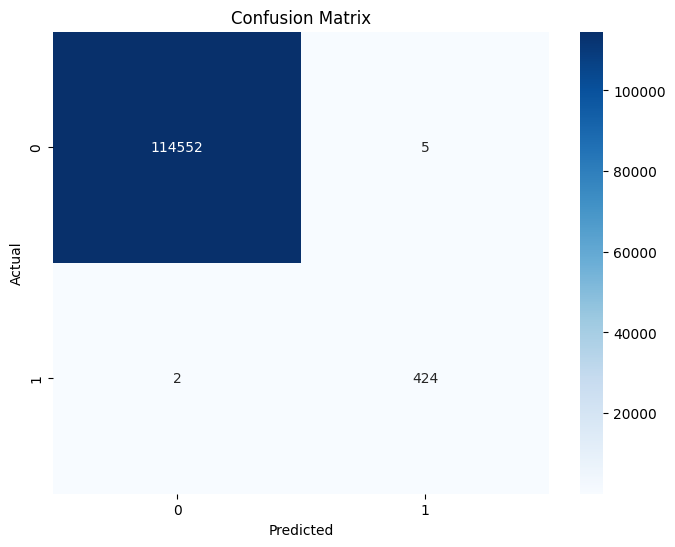

In [ ]:


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

3594/3594 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


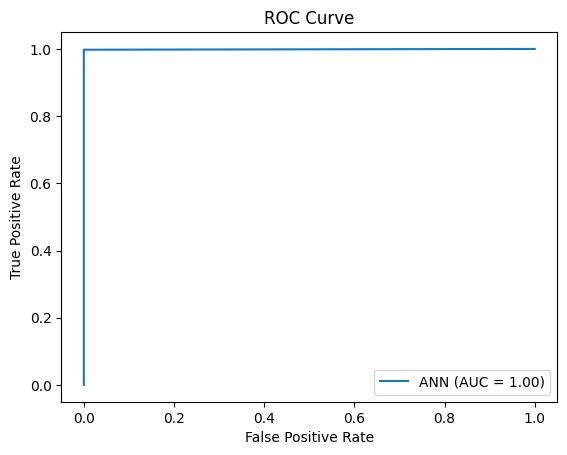

In [ ]:
y_pred_proba = model.predict(x_test)
y_pred_proba=(1/(1+np.exp(-y_pred_proba)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ANN (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

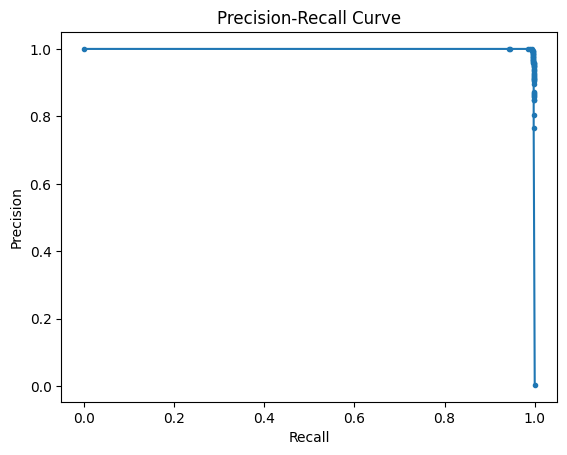

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    114557
        True       0.99      1.00      0.99       426

    accuracy                           1.00    114983
   macro avg       0.99      1.00      1.00    114983
weighted avg       1.00      1.00      1.00    114983



In [ ]:
accuracy_ann = accuracy_score(y_test,y_pred)
print(accuracy_ann)

0.9999391214353426


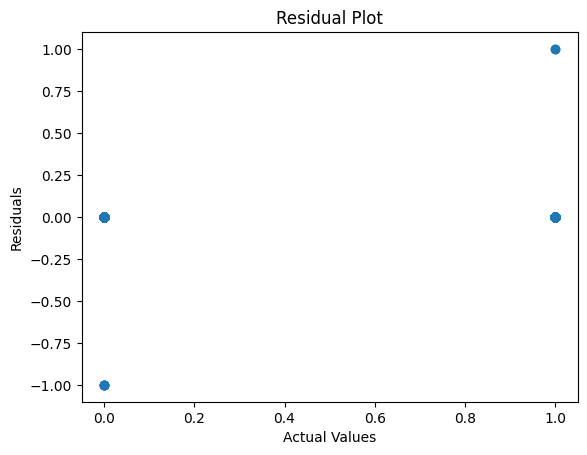

In [ ]:

residuals = y_test.astype(int) - y_pred.astype(int).flatten()
plt.scatter(y_test.astype(int), residuals)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

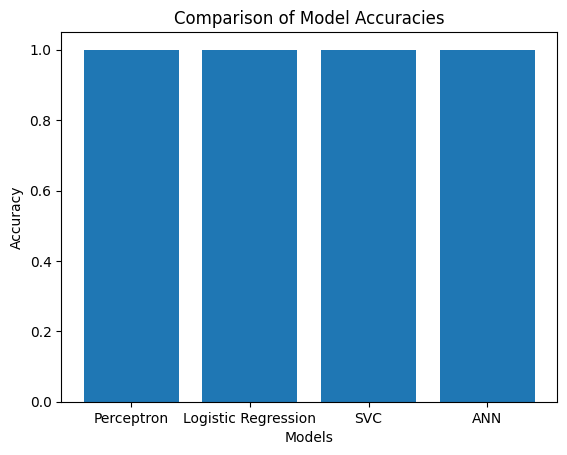

In [ ]:
model_names = ['Perceptron', 'Logistic Regression', 'SVC', 'ANN']
accuracies = [accuracy_perceptron, accuracy_logistic, accuracy_svc, accuracy_ann]
plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()


#After resampling the data

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X,Y= smote.fit_resample(x,target)


In [ ]:
for clo in X.columns:
  print(X[clo].describe())
  print()
  print()
  print()

count    1.145640e+06
mean     3.639919e-01
std      8.002086e-01
min     -1.831916e+00
25%      7.387147e-01
50%      7.387147e-01
75%      7.387147e-01
max      7.387147e-01
Name: cmp_fname_c1, dtype: float64



count    1.145640e+06
mean     1.767597e-01
std      1.529477e+00
min     -1.292313e-01
25%     -1.292313e-01
50%     -1.292313e-01
75%     -1.292313e-01
max      7.886075e+00
Name: cmp_fname_c2, dtype: float64



count    1.145640e+06
mean     1.017212e+00
std      1.244444e+00
min     -9.441234e-01
25%     -4.454934e-01
50%      2.047657e+00
75%      2.047657e+00
max      2.047657e+00
Name: cmp_lname_c1, dtype: float64



count    1.145640e+06
mean     1.179566e+00
std      1.072766e+01
min     -1.334843e-02
25%     -1.334843e-02
50%     -1.334843e-02
75%     -1.334843e-02
max      9.820641e+01
Name: cmp_lname_c2, dtype: float64



count    1.145640e+06
mean     8.349587e-02
std      7.901428e-01
min     -4.611715e+00
25%      2.168391e-01
50%      2.168391e-01
75%      2.1

In [ ]:
for clo in X.columns:
  print(X[clo].info())
  print()
  print()
  print()

<class 'pandas.core.series.Series'>
RangeIndex: 1145640 entries, 0 to 1145639
Series name: cmp_fname_c1
Non-Null Count    Dtype  
--------------    -----  
1145640 non-null  float64
dtypes: float64(1)
memory usage: 8.7 MB
None



<class 'pandas.core.series.Series'>
RangeIndex: 1145640 entries, 0 to 1145639
Series name: cmp_fname_c2
Non-Null Count    Dtype  
--------------    -----  
1145640 non-null  float64
dtypes: float64(1)
memory usage: 8.7 MB
None



<class 'pandas.core.series.Series'>
RangeIndex: 1145640 entries, 0 to 1145639
Series name: cmp_lname_c1
Non-Null Count    Dtype  
--------------    -----  
1145640 non-null  float64
dtypes: float64(1)
memory usage: 8.7 MB
None



<class 'pandas.core.series.Series'>
RangeIndex: 1145640 entries, 0 to 1145639
Series name: cmp_lname_c2
Non-Null Count    Dtype  
--------------    -----  
1145640 non-null  float64
dtypes: float64(1)
memory usage: 8.7 MB
None



<class 'pandas.core.series.Series'>
RangeIndex: 1145640 entries, 0 to 1145639
Se

In [ ]:
for clo in X.columns:
  print(X[clo].value_counts())
  print()
  print()
  print()

cmp_fname_c1
 0.738715    914572
-1.831916     46158
-0.803663     28162
-1.464683     16041
-1.403477     15501
              ...  
 0.635085         1
 0.423153         1
-0.316576         1
-1.709902         1
 0.231647         1
Name: count, Length: 4805, dtype: int64



cmp_fname_c2
-0.129231    1100639
 7.886075      42924
 3.076891        189
 1.015812        172
 1.206653        136
              ...   
 2.901328          1
 5.589708          1
 5.404667          1
 3.745159          1
 3.478474          1
Name: count, Length: 1138, dtype: int64



cmp_lname_c1
 2.047657    639212
-0.944123    120134
-0.570151     38464
-0.516726     37906
-0.611703     29772
              ...  
 1.672163         1
-0.522860         1
 1.675029         1
 1.760428         1
 1.714446         1
Name: count, Length: 4319, dtype: int64



cmp_lname_c2
-0.013348     1131337
 98.206406      13371
 12.264121         15
 16.356611         12
 10.899958         12
               ...   
 84.124626      

In [ ]:
for clo in X.columns:
  print(X[clo].unique())
  print()
  print()
  print()

[0.31027635 0.73871474 0.45308915 ... 0.42715807 0.30842685 0.23164684]



[-0.12923128  7.88607495  3.30589996 ...  7.39046366  0.75489457
  3.47847425]



[ 2.04765662 -0.19617837  1.74847862 ...  1.68371413  1.75878974
  1.71444569]



[-1.33484298e-02  9.82064057e+01  8.72930997e+01  1.63566106e+01
  8.18364467e+01  1.40180450e+01  9.80862699e+00  1.22641208e+01
  2.18132636e+01  2.80494385e+01  1.08999576e+01  3.27265696e+01
  2.45415901e+01  2.67738573e+01  2.94525778e+01  8.17163108e+00
  1.96306024e+01  4.20808319e+01  3.92745532e+01  1.78447887e+01
  6.54664877e+01  3.68190594e+01  1.50973830e+01  8.91572013e+00
  5.61122254e+01  8.84288323e+01  6.70402045e+00  9.38896063e+01
  8.97395322e+01  1.96103080e+00  1.60577908e+01  8.56598159e+01
  8.30629680e+01  8.80087716e+01  8.32326246e+01  8.62004014e+01
  9.78496992e+01  9.78223214e+01  1.07818741e+01  9.43762050e+01
  8.48158780e+01  1.25425020e+01  8.58503897e+01  9.44111879e+01
  9.81786293e+01  9.10040277e+01  9.06409694e+

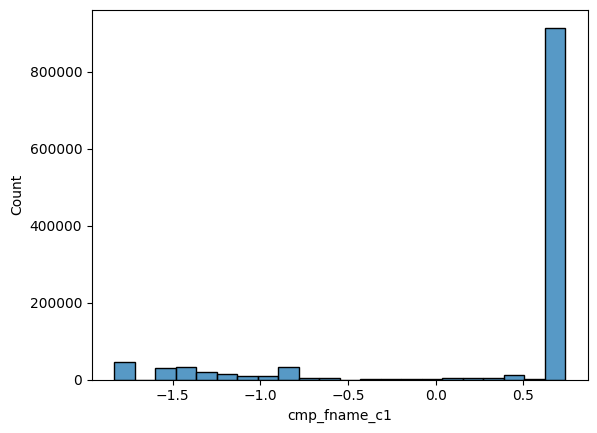

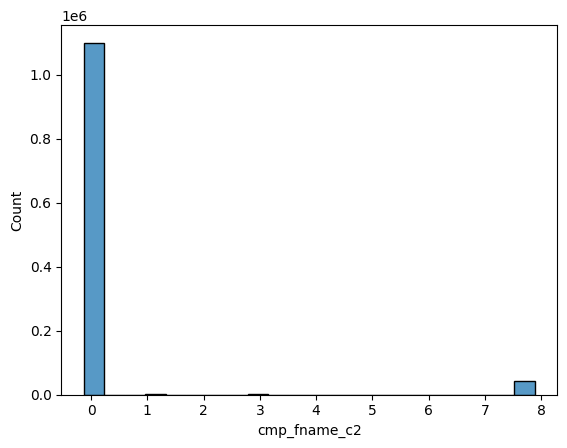

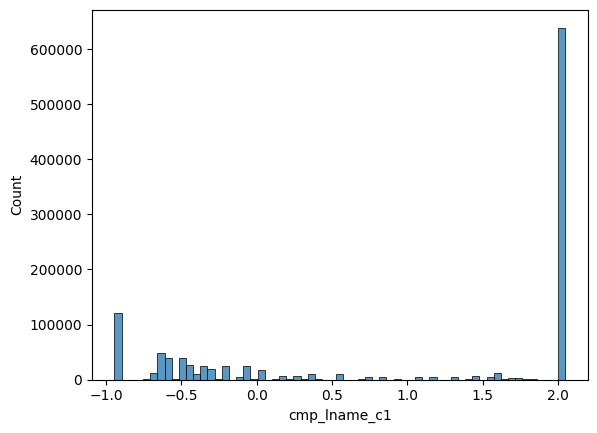

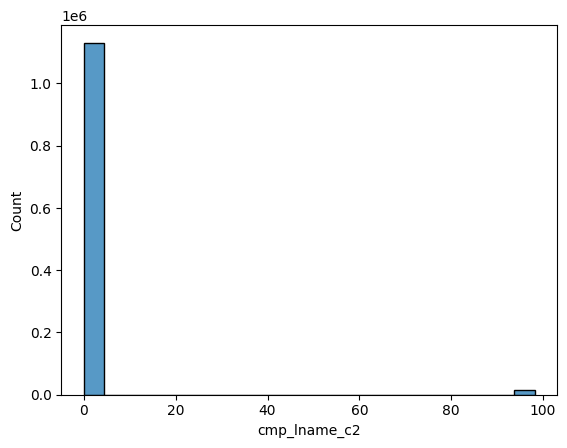

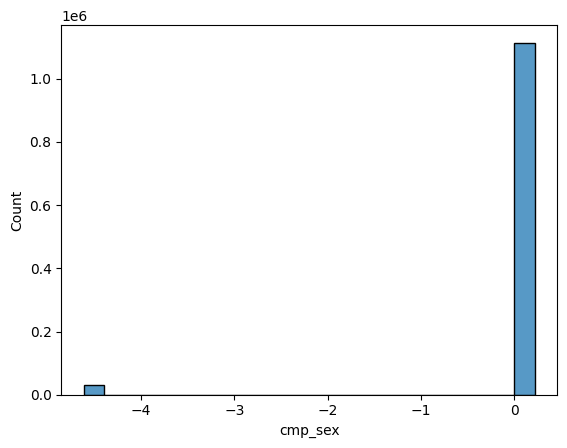

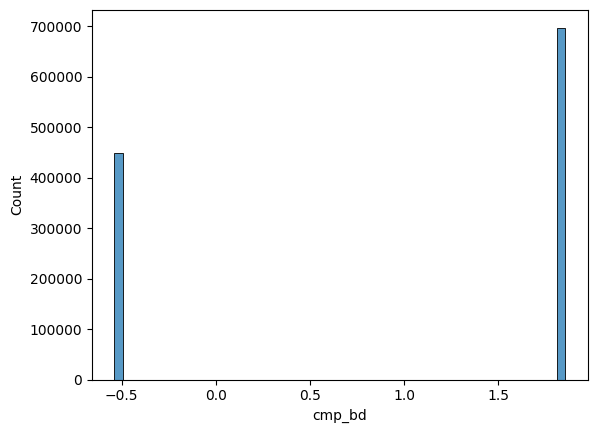

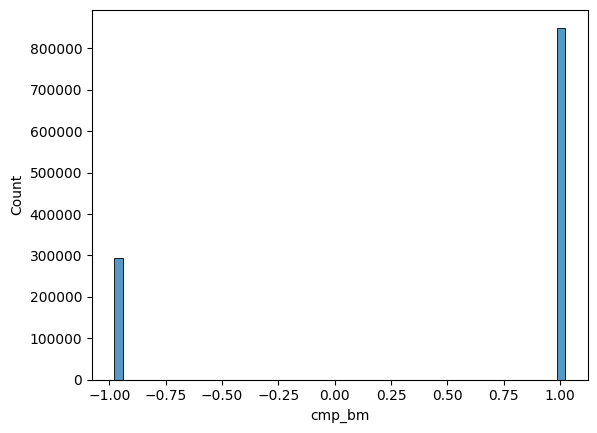

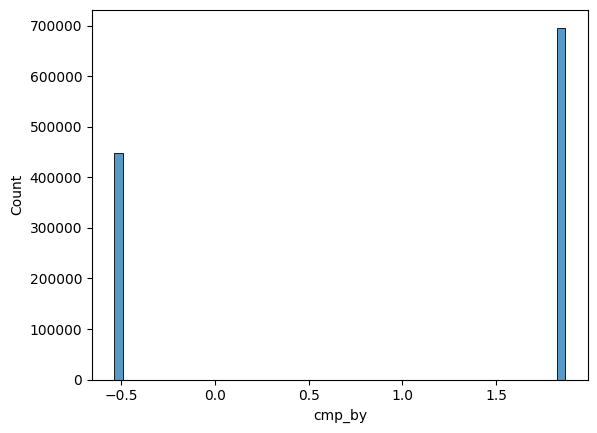

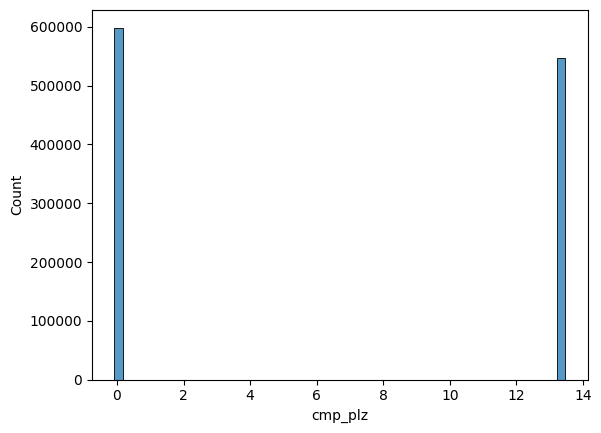

In [ ]:
for clo in X.columns:
  if X[clo].dtype == 'int64':
    sns.histplot(X[clo], discrete=True)
  elif X[clo].dtype == 'float64':
    sns.histplot(X[clo])

  plt.show()

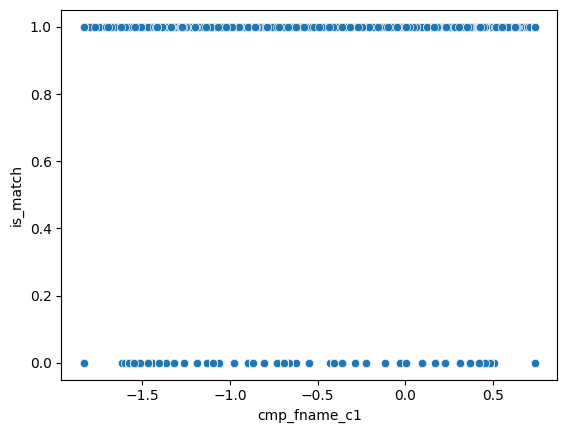

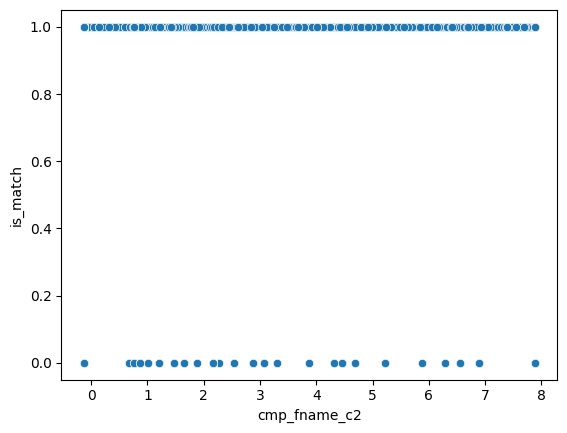

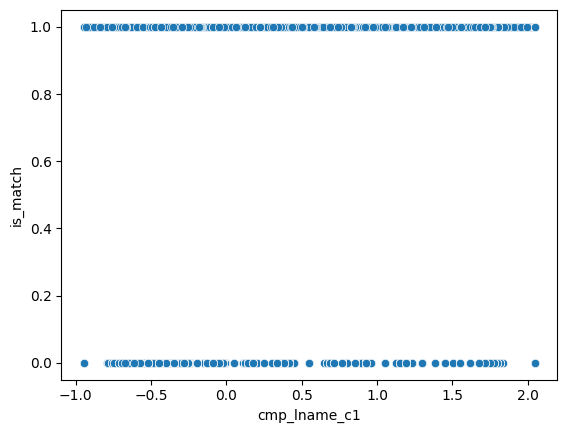

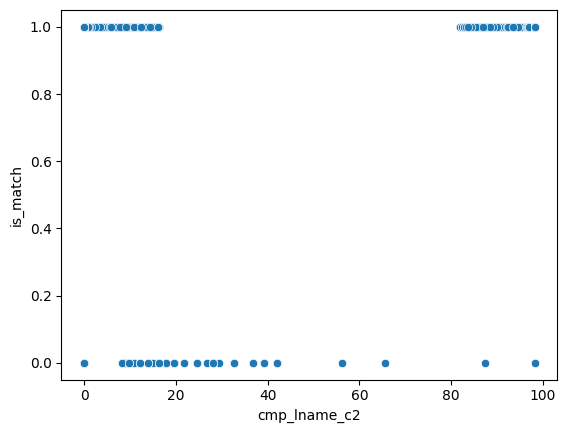

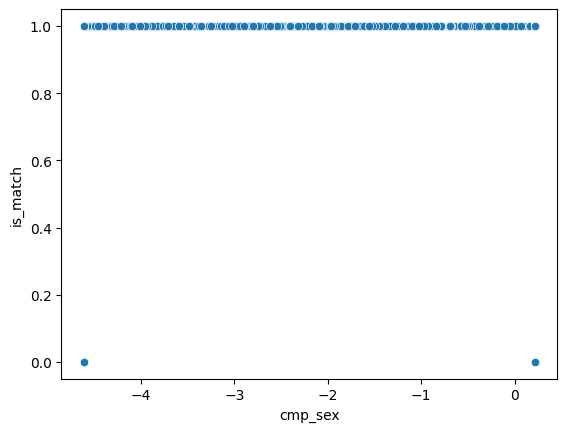

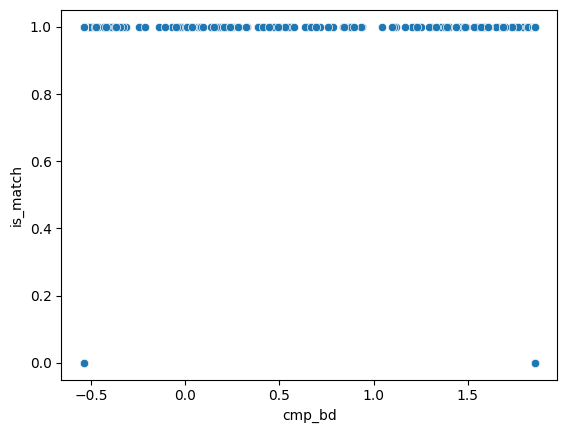

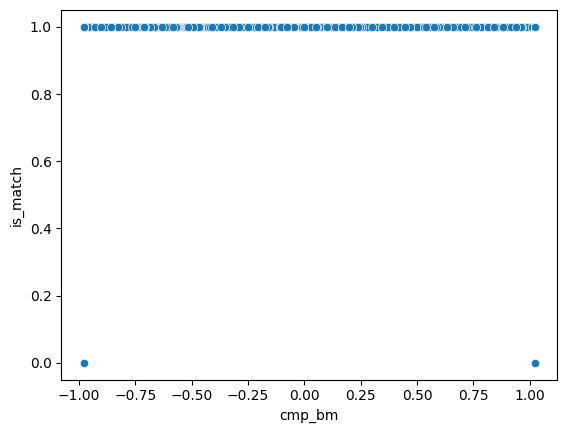

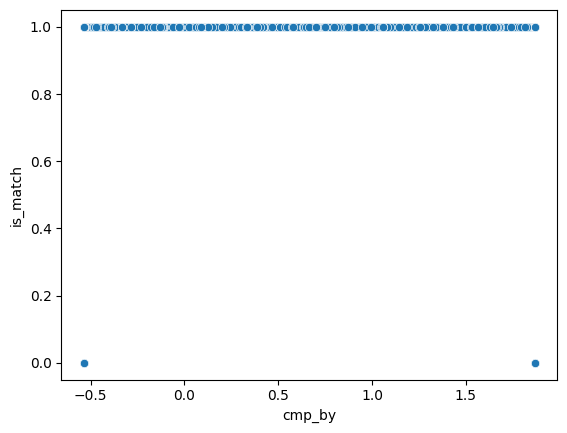

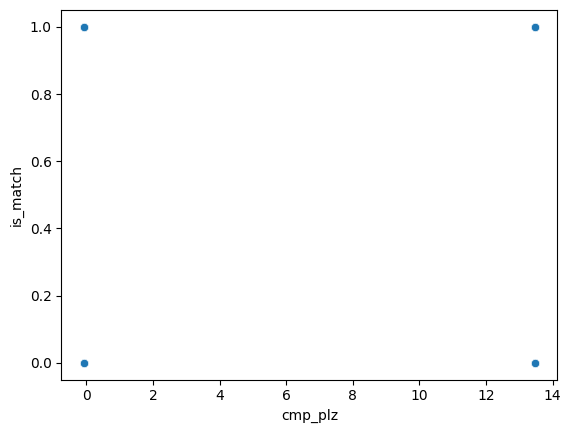

In [ ]:
for col in X.columns:
    sns.scatterplot(x=X[col],y=Y)
    plt.show()

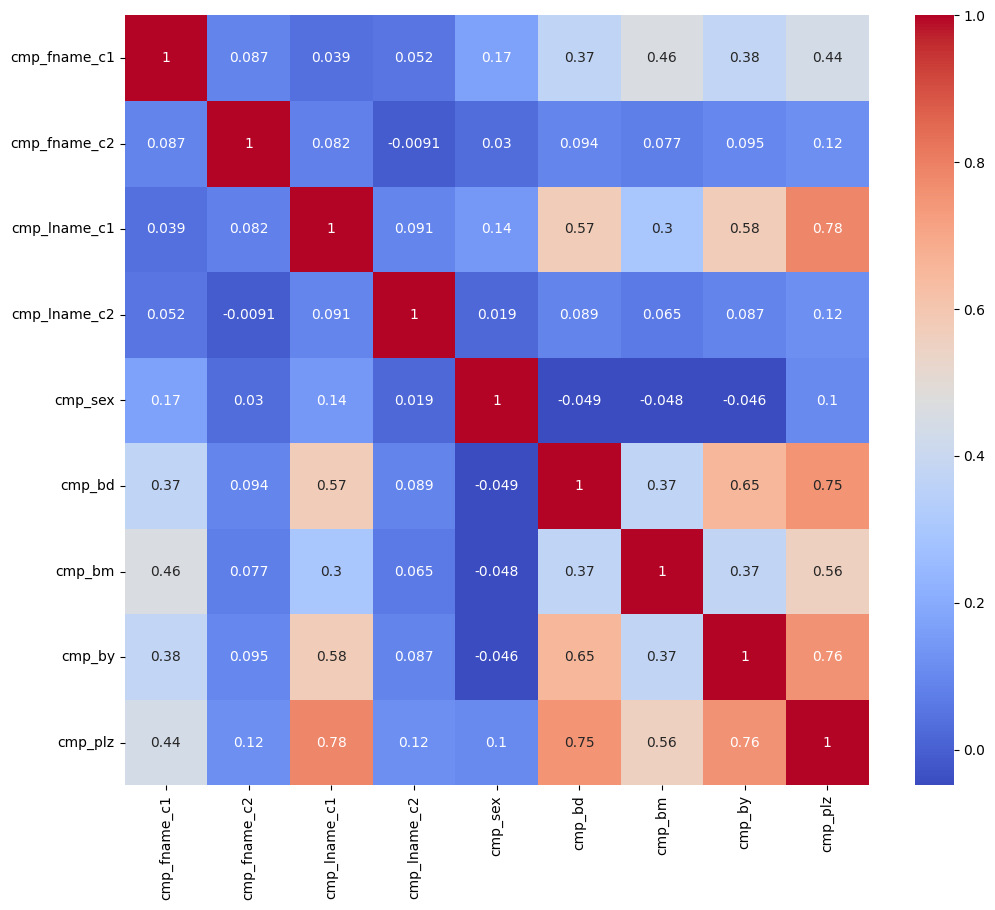

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
Y.value_counts()

,count
is_match,
True,572820
False,572820


In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1145640 entries, 0 to 1145639
Series name: is_match
Non-Null Count    Dtype
--------------    -----
1145640 non-null  bool 
dtypes: bool(1)
memory usage: 1.1 MB


In [ ]:
Y.describe()

,is_match
count,1145640
unique,2
top,True
freq,572820


##Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
x_train

,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz
206374,-1.831916,-0.129231,-0.445493,-0.013348,0.216839,1.857352,1.023100,1.868558,-0.074248
308058,0.738715,-0.129231,-0.345767,-0.013348,0.216839,1.857352,-0.977422,-0.535172,-0.074248
588420,0.738715,-0.129231,2.047657,-0.013348,0.216839,1.857352,1.023100,1.868558,13.468343
413351,-1.831916,-0.129231,2.047657,-0.013348,0.216839,-0.538401,-0.977422,-0.535172,-0.074248
606894,0.738715,-0.129231,2.047657,-0.013348,0.216839,1.857352,1.023100,1.868558,13.468343
...,...,...,...,...,...,...,...,...,...
110268,0.738715,-0.129231,-0.516726,-0.013348,0.216839,1.857352,-0.977422,-0.535172,-0.074248
259178,0.738715,-0.129231,-0.345767,-0.013348,0.216839,-0.538401,-0.977422,1.868558,-0.074248
131932,-1.464683,-0.129231,0.717977,-0.013348,0.216839,-0.538401,1.023100,-0.535172,-0.074248
671155,0.738715,-0.129231,2.047657,-0.013348,0.216839,1.857352,1.023100,1.868558,13.468343


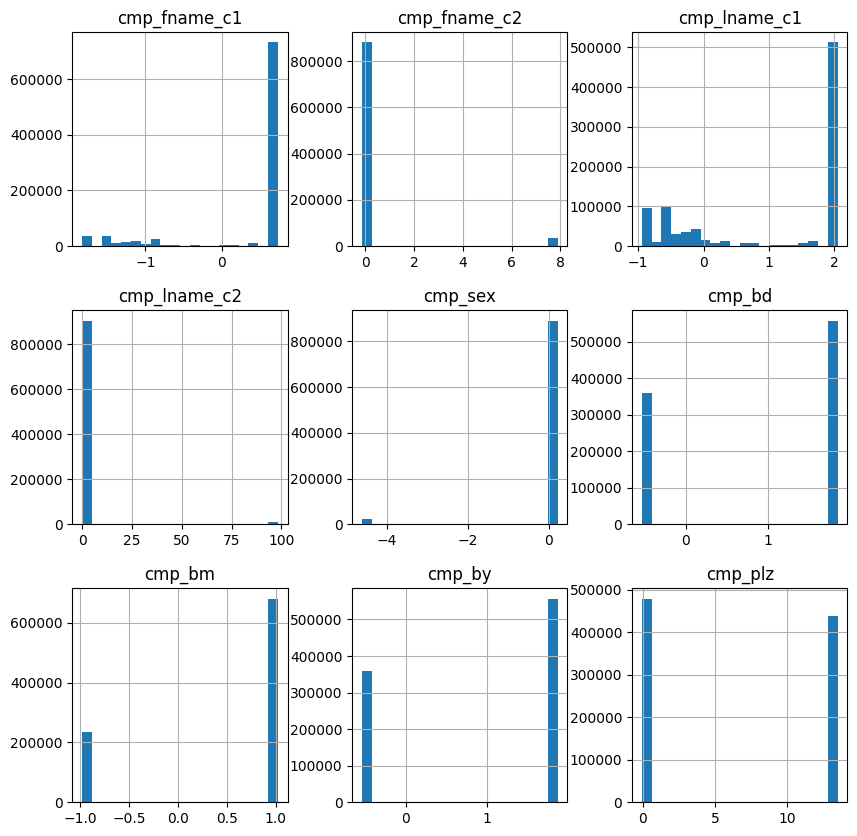

In [ ]:
x_train.hist(bins=20, figsize=(10,10))
plt.show()

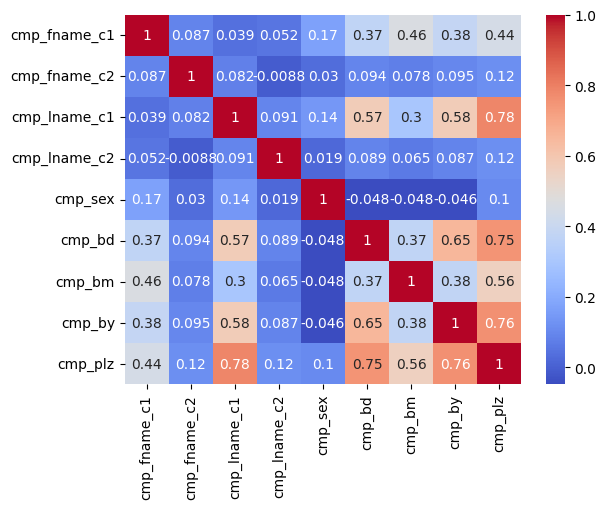

In [ ]:
sns.heatmap(x_train.corr(), annot=True, cmap='coolwarm')
plt.show()


##Perceptron

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay,roc_curve,auc,precision_recall_curve

In [ ]:
from sklearn.linear_model import Perceptron
pm=Perceptron()
pm.fit(x_train,y_train)

Perceptron()

In [ ]:
yp=pm.predict(x_test)

In [ ]:

cm = confusion_matrix(y_test,yp)
print(cm)

[[114664     26]
 [    14 114424]]


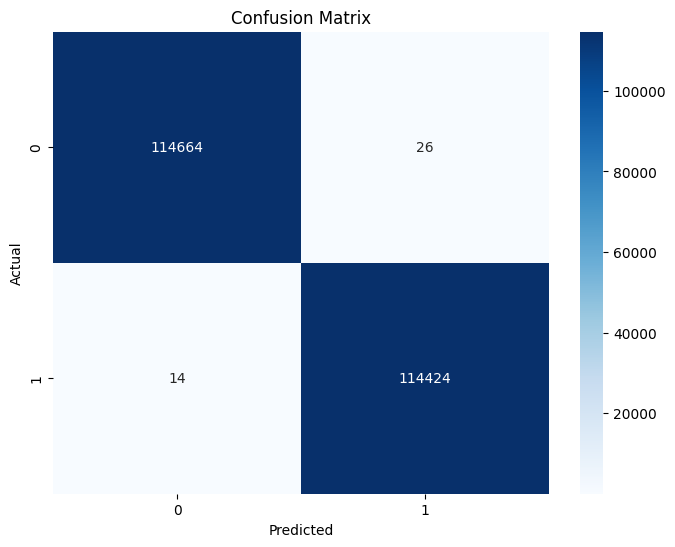

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<ipython-input-101-45179967bab9>:2: RuntimeWarning: overflow encountered in exp
  y_pred_proba=(1/(1+np.exp(-y_pred_proba)))


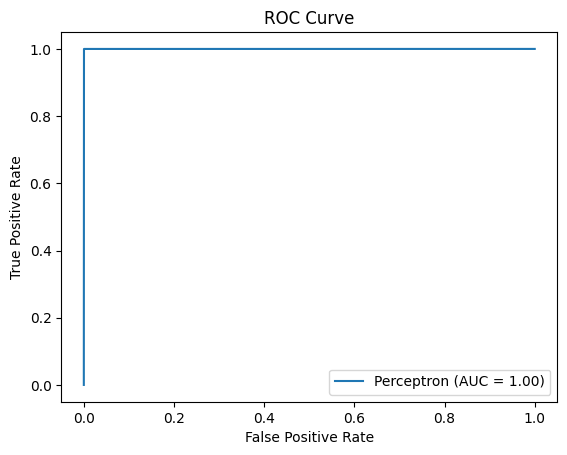

In [ ]:
y_pred_proba = pm.decision_function(x_test)
y_pred_proba=(1/(1+np.exp(-y_pred_proba)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Perceptron (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

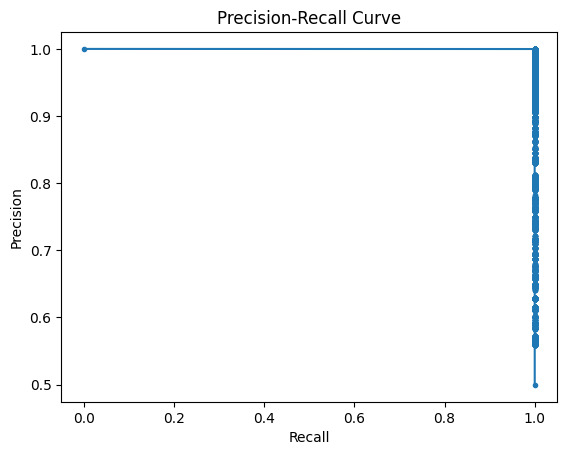

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    114690
        True       1.00      1.00      1.00    114438

    accuracy                           1.00    229128
   macro avg       1.00      1.00      1.00    229128
weighted avg       1.00      1.00      1.00    229128



In [ ]:
accuracy_perceptron = accuracy_score(y_test,yp)
print(accuracy_perceptron)

0.9998254250899061


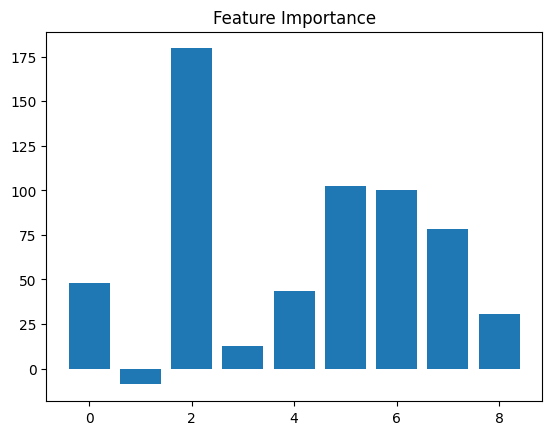

In [ ]:
importance = pm.coef_[0]
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance")
plt.show()



##LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
yp = lr.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, yp)
print(cm)

[[114670     20]
 [    20 114418]]


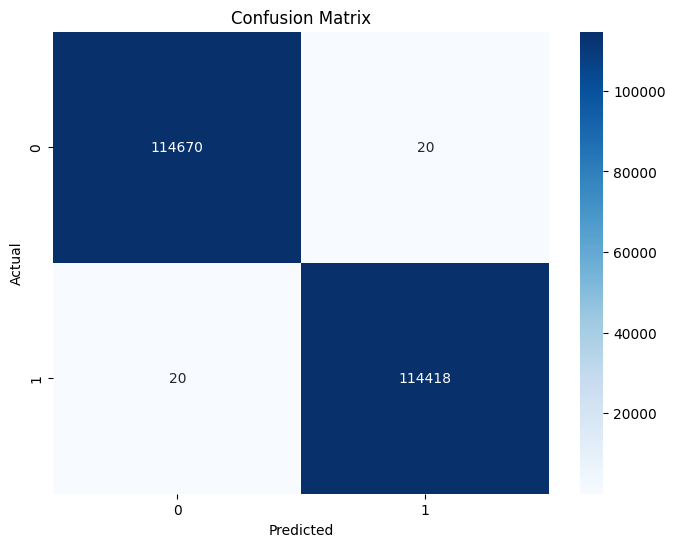

In [ ]:


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


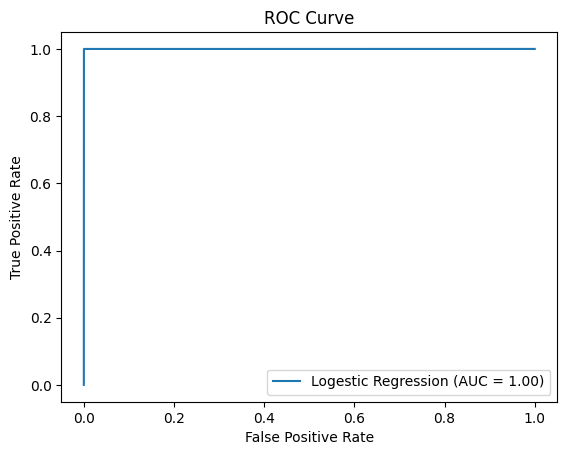

In [ ]:
y_pred_proba = lr.decision_function(x_test)
y_pred_proba=(1/(1+np.exp(-y_pred_proba)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Logestic Regression (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

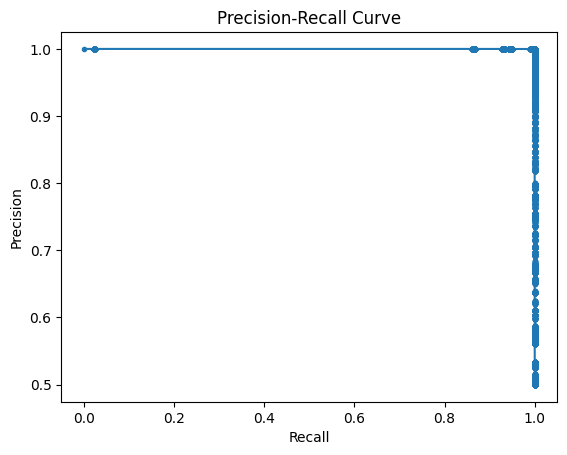

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

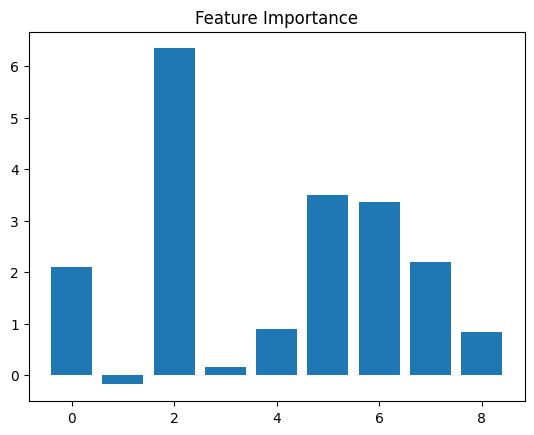

In [ ]:
importance = lr.coef_[0]
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance")
plt.show()


In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    114690
        True       1.00      1.00      1.00    114438

    accuracy                           1.00    229128
   macro avg       1.00      1.00      1.00    229128
weighted avg       1.00      1.00      1.00    229128



In [ ]:
accuracy_logistic=accuracy_score(y_test,yp)
print(accuracy_logistic)

0.9998254250899061


##Support Vector Mechine

In [ ]:
from cuml.svm import SVC as cumlSVC
import cupy as cp
sv=cumlSVC()
sv.fit(x_train,y_train)

SVC()

In [ ]:
yp=sv.predict(x_test)

In [ ]:

cm = confusion_matrix(y_test, yp)
print(cm)

[[114678     12]
 [    32 114406]]


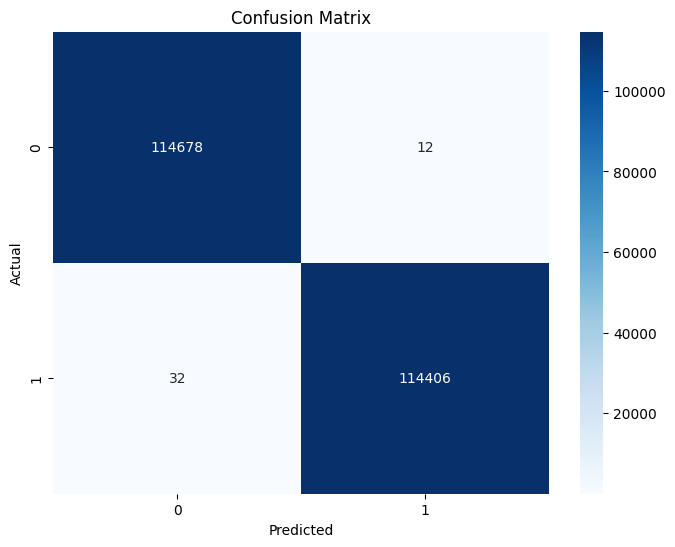

In [ ]:


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


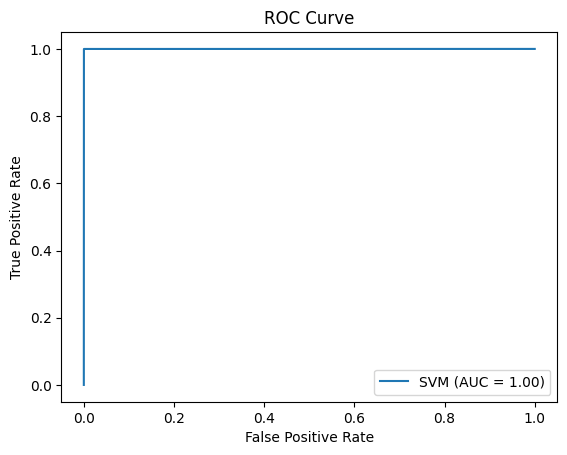

In [ ]:
y_pred_proba = sv.decision_function(x_test)
y_pred_proba=(1/(1+np.exp(-y_pred_proba)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

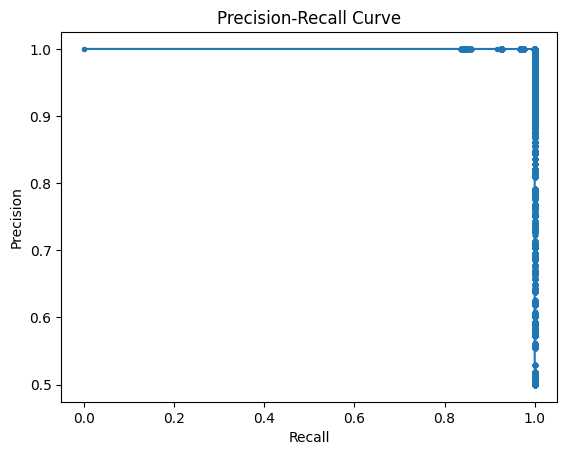

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    114690
        True       1.00      1.00      1.00    114438

    accuracy                           1.00    229128
   macro avg       1.00      1.00      1.00    229128
weighted avg       1.00      1.00      1.00    229128



In [ ]:
accuracy_svc = accuracy_score(y_test,yp)
print(accuracy_svc)

0.9998079675988967


##ANN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - accuracy: 0.9988 - loss: 0.0049
Epoch 2/5
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.9999 - loss: 3.5225e-04
Epoch 3/5
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.9999 - loss: 2.5236e-04
Epoch 4/5
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - accuracy: 0.9999 - loss: 3.0920e-04
Epoch 5/5
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.9999 - loss: 2.2967e-04


In [ ]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

7161/7161 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9999 - loss: 4.1153e-04
Accuracy: 99.99


In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

7161/7161 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


In [ ]:
cm =confusion_matrix(y_test,y_pred)
print(cm)

[[114686      4]
 [    17 114421]]


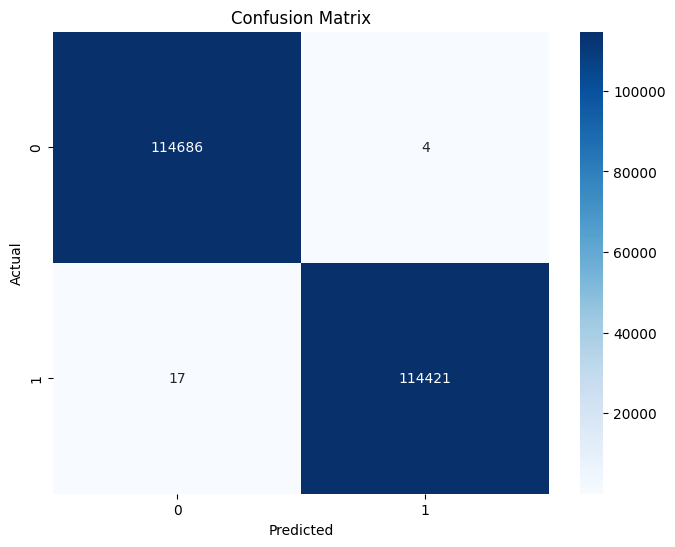

In [ ]:


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

7161/7161 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


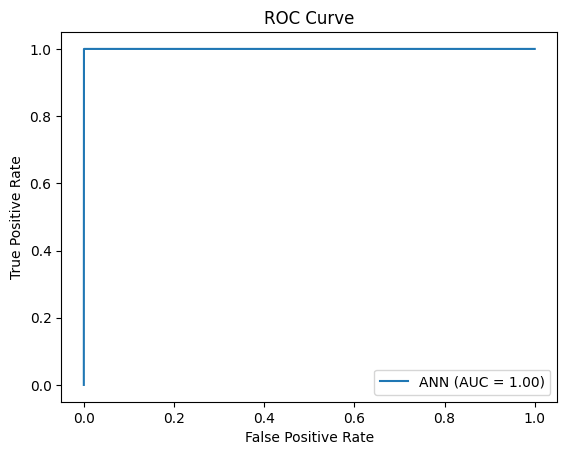

In [ ]:
y_pred_proba = model.predict(x_test)
y_pred_proba=(1/(1+np.exp(-y_pred_proba)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ANN (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

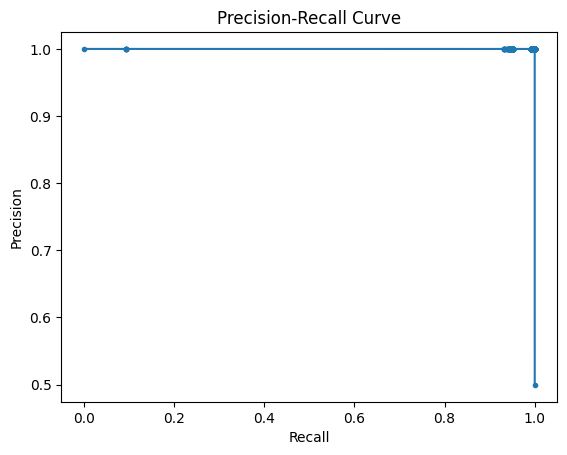

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    114690
        True       1.00      1.00      1.00    114438

    accuracy                           1.00    229128
   macro avg       1.00      1.00      1.00    229128
weighted avg       1.00      1.00      1.00    229128



In [ ]:
accuracy_ann = accuracy_score(y_test,y_pred)
print(accuracy_ann)

0.9999083481722006


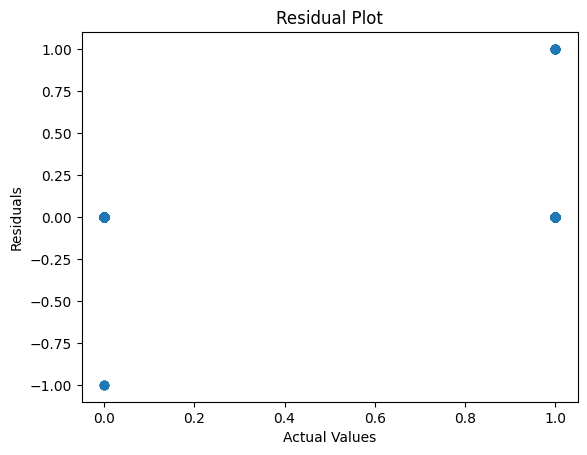

In [ ]:

residuals = y_test.astype(int) - y_pred.astype(int).flatten()
plt.scatter(y_test.astype(int), residuals)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

#BootStraping

In [ ]:
from sklearn.utils import resample
def bootstrapping(x_train,y_train):
    x_train_boot, y_train_boot = resample(x_train, y_train, replace=True, n_samples=len(x_train), random_state=42)
    return x_train_boot,y_train_boot

In [ ]:
x_train_boot,y_train_boot=bootstrapping(x_train,y_train)

##Perceptron

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay,roc_curve,auc,precision_recall_curve

In [ ]:
from sklearn.linear_model import Perceptron
pm=Perceptron()
pm.fit(x_train_boot,y_train_boot)

Perceptron()

In [ ]:
yp=pm.predict(x_test)

In [ ]:

cm = confusion_matrix(y_test,yp)
print(cm)

[[114665     25]
 [    19 114419]]


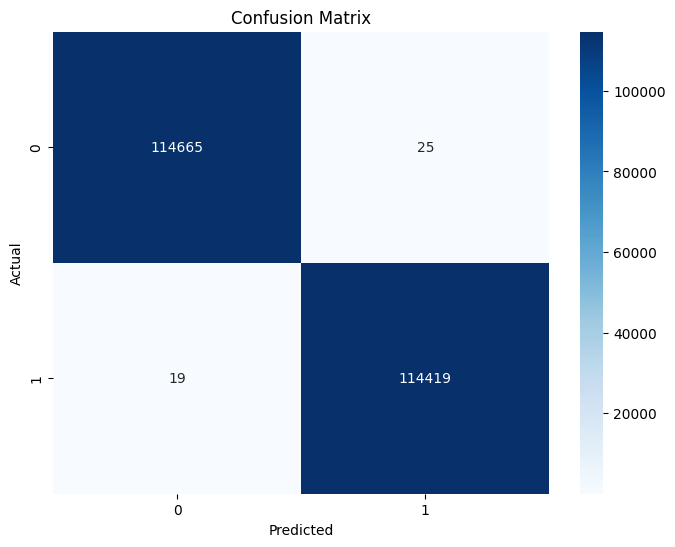

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<ipython-input-22-45179967bab9>:2: RuntimeWarning: overflow encountered in exp
  y_pred_proba=(1/(1+np.exp(-y_pred_proba)))


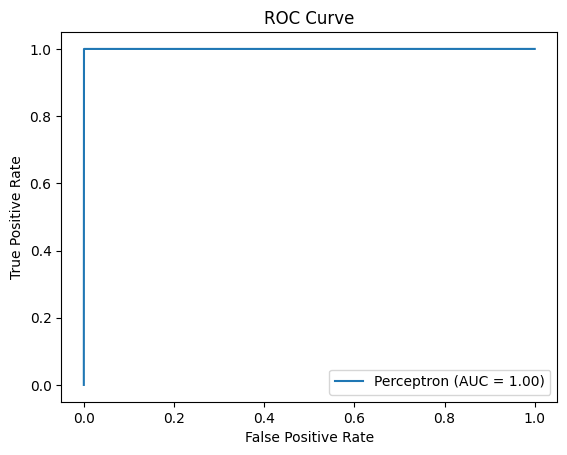

In [ ]:
y_pred_proba = pm.decision_function(x_test)
y_pred_proba=(1/(1+np.exp(-y_pred_proba)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Perceptron (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

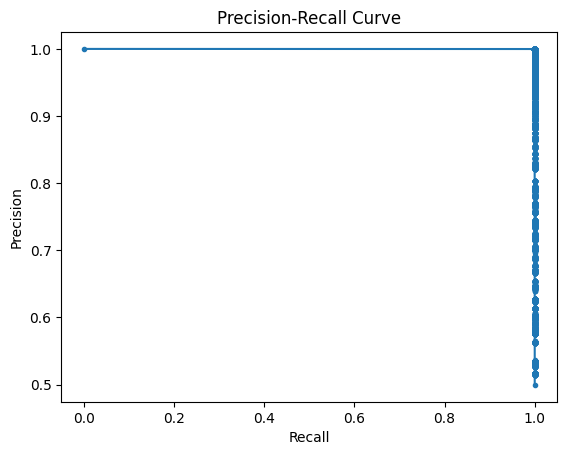

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    114690
        True       1.00      1.00      1.00    114438

    accuracy                           1.00    229128
   macro avg       1.00      1.00      1.00    229128
weighted avg       1.00      1.00      1.00    229128



In [ ]:
accuracy_perceptron = accuracy_score(y_test,yp)
print(accuracy_perceptron)

0.9998079675988967


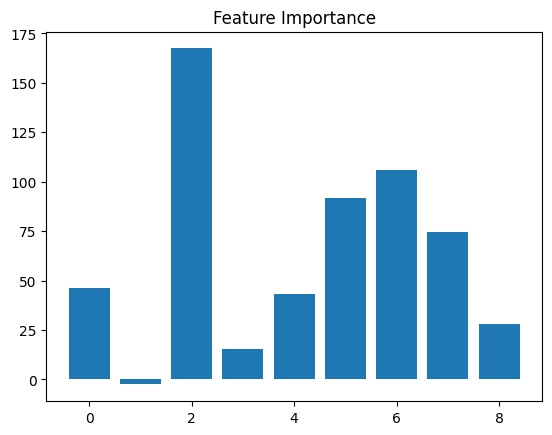

In [ ]:
importance = pm.coef_[0]
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance")
plt.show()



##LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_boot,y_train_boot)

LogisticRegression()

In [ ]:
yp = lr.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, yp)
print(cm)

[[114669     21]
 [    22 114416]]


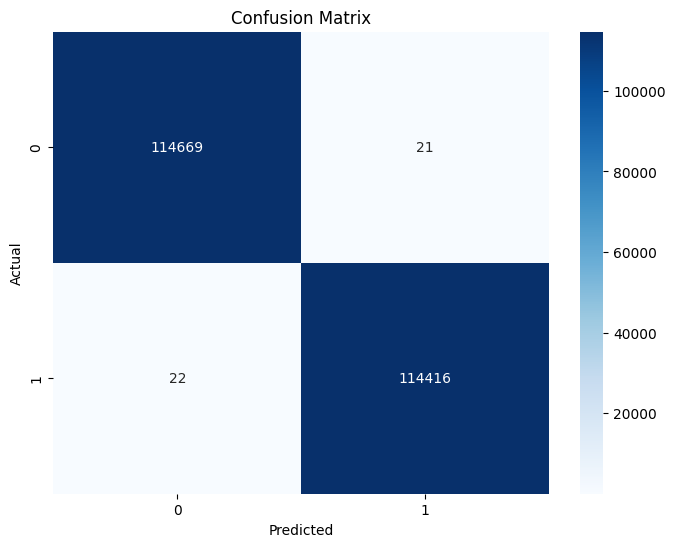

In [ ]:


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


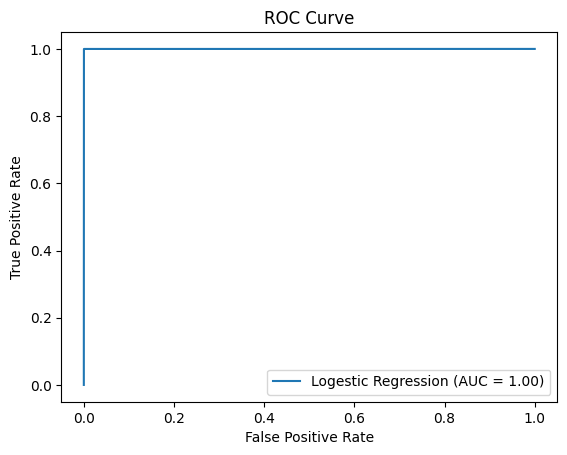

In [ ]:
y_pred_proba = lr.decision_function(x_test)
y_pred_proba=(1/(1+np.exp(-y_pred_proba)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Logestic Regression (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

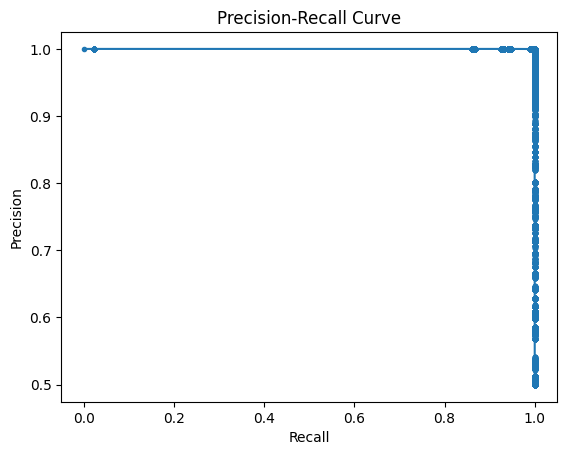

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

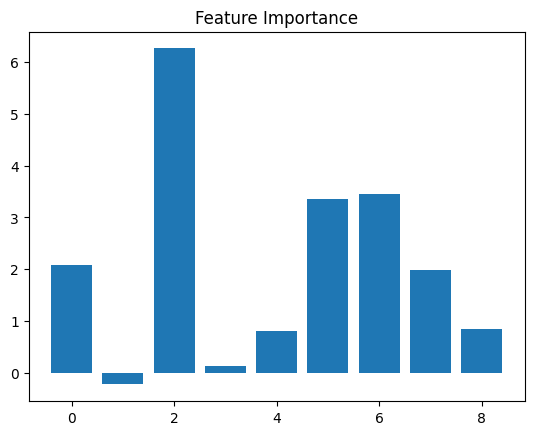

In [ ]:
importance = lr.coef_[0]
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance")
plt.show()


In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    114690
        True       1.00      1.00      1.00    114438

    accuracy                           1.00    229128
   macro avg       1.00      1.00      1.00    229128
weighted avg       1.00      1.00      1.00    229128



In [ ]:
accuracy_logistic=accuracy_score(y_test,yp)
print(accuracy_logistic)

0.999812331971649


##Support Vector Mechine

In [ ]:
from sklearn.svm import SVC as cumlSVC
import cupy as cp
sv=cumlSVC()
sv.fit(x_train_boot,y_train_boot)

SVC()

In [ ]:
yp=sv.predict(x_test)

In [ ]:

cm = confusion_matrix(y_test, yp)
print(cm)

[[114678     12]
 [    31 114407]]


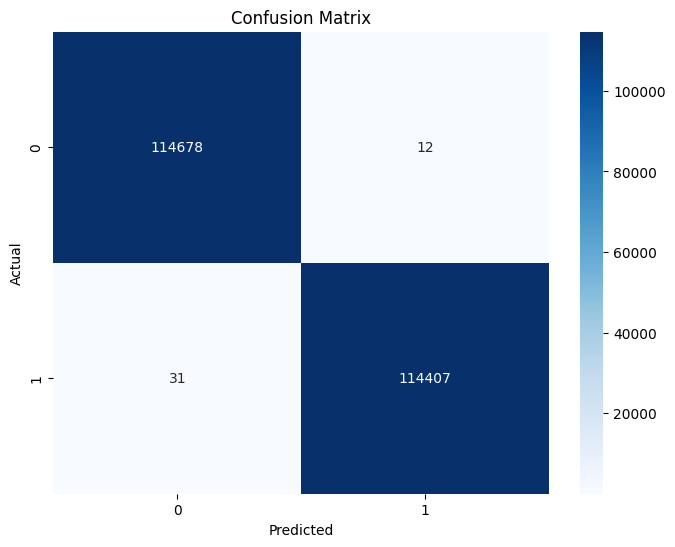

In [ ]:


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


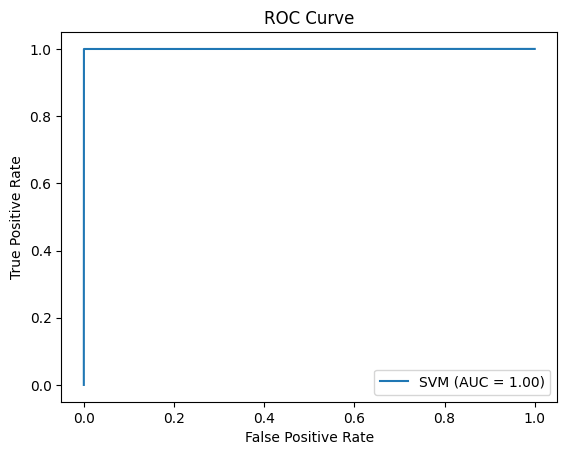

In [ ]:
y_pred_proba = sv.decision_function(x_test)
y_pred_proba=(1/(1+np.exp(-y_pred_proba)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

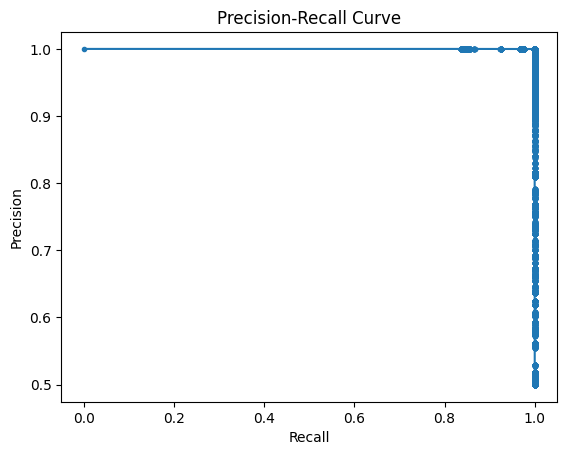

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    114690
        True       1.00      1.00      1.00    114438

    accuracy                           1.00    229128
   macro avg       1.00      1.00      1.00    229128
weighted avg       1.00      1.00      1.00    229128



In [ ]:
accuracy_svc = accuracy_score(y_test,yp)
print(accuracy_svc)

0.999812331971649


##ANN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train_boot,y_train_boot, epochs=5, batch_size=32)


Epoch 1/5
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.9991 - loss: 0.0049
Epoch 2/5
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.9999 - loss: 3.2289e-04
Epoch 3/5
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.9999 - loss: 2.8314e-04
Epoch 4/5
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.9999 - loss: 2.4150e-04
Epoch 5/5
28641/28641 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.9999 - loss: 3.0081e-04


In [ ]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

7161/7161 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9999 - loss: 4.0268e-04
Accuracy: 99.99


In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

7161/7161 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


In [ ]:
cm =confusion_matrix(y_test,y_pred)
print(cm)

[[114680     10]
 [     2 114436]]


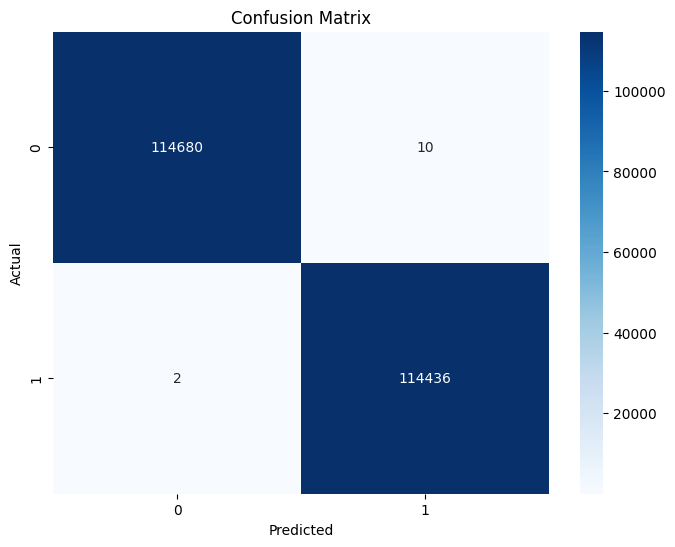

In [ ]:


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

7161/7161 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


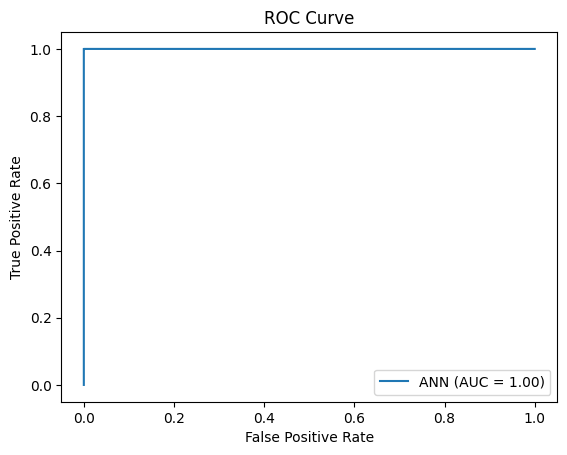

In [ ]:
y_pred_proba = model.predict(x_test)
y_pred_proba=(1/(1+np.exp(-y_pred_proba)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ANN (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

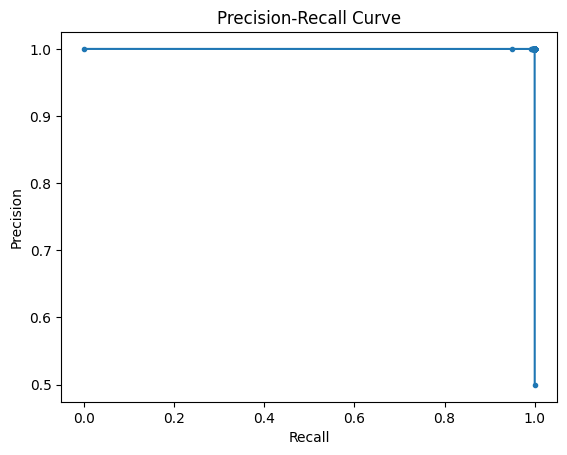

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    114690
        True       1.00      1.00      1.00    114438

    accuracy                           1.00    229128
   macro avg       1.00      1.00      1.00    229128
weighted avg       1.00      1.00      1.00    229128



In [ ]:
accuracy_ann = accuracy_score(y_test,y_pred)
print(accuracy_ann)

0.9999476275269719


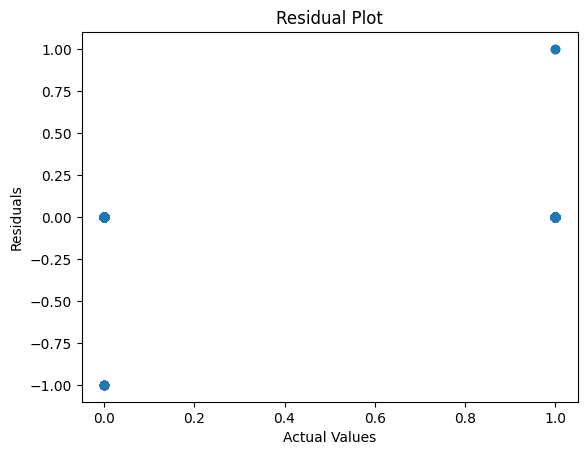

In [ ]:

residuals = y_test.astype(int) - y_pred.astype(int).flatten()
plt.scatter(y_test.astype(int), residuals)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()



---

#Comparision

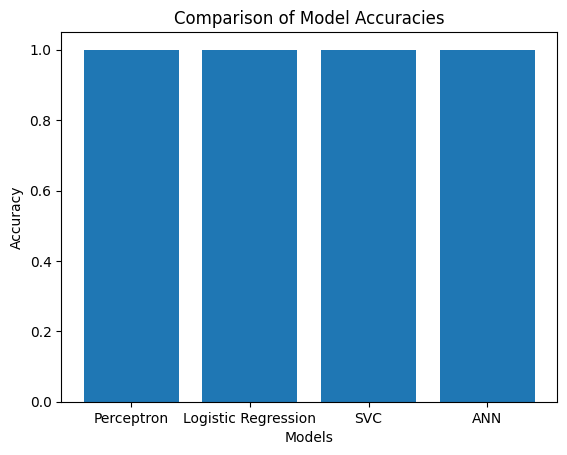

In [ ]:
model_names = ['Perceptron', 'Logistic Regression', 'SVC', 'ANN']
accuracies = [accuracy_perceptron, accuracy_logistic, accuracy_svc, accuracy_ann]
plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()


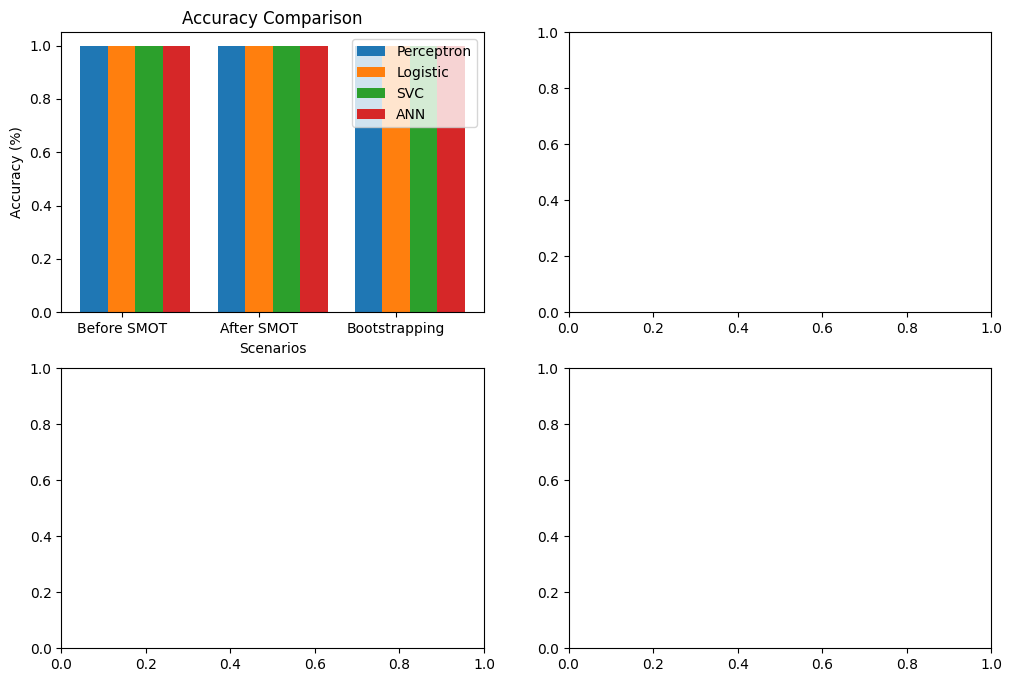

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Example Data
scenarios = ['Before SMOT', 'After SMOT', 'Bootstrapping']
models = ['Perceptron', 'Logistic', 'SVC', 'ANN']
accuracies = {
    'Perceptron': [0.9998782428706853, 0.9998254250899061, 0.9998079675988967],
    'Logistic': [0.9999739091865754, 0.9998254250899061, 0.999812331971649],
    'SVC': [0.999956515310959, 0.9998079675988967, 0.999812331971649],
    'ANN': [0.9999391214353426, 0.9999083481722006, 0.9999476275269719]
}
residuals = {
    'Perceptron': np.random.randn(100),
    'Logistic': np.random.randn(100),
    'SVC': np.random.randn(100),
    'ANN': np.random.randn(100)
}

# Accuracy Bar Chart
x = np.arange(len(scenarios))  # Bar positions
width = 0.2

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
ax1 = axes[0, 0]
for i, model in enumerate(models):
    ax1.bar(x + i * width, accuracies[model], width, label=model)

ax1.set_xlabel('Scenarios')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Accuracy Comparison')
ax1.set_xticks(x + width)
ax1.set_xticklabels(scenarios)
ax1.legend()


